#**Credit Card Approval**

In [ ]:
# dataframes names for understanding

# df1 --> Credit_card.csv
# df2 --> Credit_card_label.csv

# df3 --> merged dataframe of both df1 and df2
# df_outliers --> is created a copy of df3 to treat outliers using IQR for the column Annual_Income

# df --> is created a copy of df_outliers and also the cleaned dataset

# df4 --> is created a copy of df (which is cleaned dataframe), to perform machine learning algorithms. basically df4 is created to perform ML-algorithms



#**Data Importing**

In [ ]:
# Importing Libraries

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization


In [ ]:
# Read the dataset
import warnings
warnings.filterwarnings("ignore")  # supressing the warnings

df1 = pd.read_csv("Credit_card.csv") # Reading the Credit_card dataset using pandas library
df1

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [ ]:
# Reading the second dataset Credit_card_label

df2 = pd.read_csv("Credit_card_label.csv")
df2

Ind_ID  label
0     5008827      1
1     5009744      1
2     5009746      1
3     5009749      1
4     5009752      1
...       ...    ...
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

[1548 rows x 2 columns]

#**Data Understanding For df1 dataframe**

In [ ]:
df1.shape

(1548, 18)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df1.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
df1.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members  
count     1548.000000  
mean         2.161499  
std          0.947772  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000

#**Data Understanding For df2 dataframe**

In [ ]:
df2.shape

(1548, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [ ]:
df2.isnull().sum()

Ind_ID    0
label     0
dtype: int64

In [ ]:
df2.describe()     # there is no use to find statistical info because this dataframe has only Ind_ID (Individual ID) and loan approval label(0 & 1)

Ind_ID        label
count  1.548000e+03  1548.000000
mean   5.078920e+06     0.113049
std    4.171759e+04     0.316755
min    5.008827e+06     0.000000
25%    5.045070e+06     0.000000
50%    5.078842e+06     0.000000
75%    5.115673e+06     0.000000
max    5.150412e+06     1.000000

#**Merging two dataframes df1 and df2**

In [ ]:
# Merging two dataframes df1 and df2 because, dataframe df2 has label column which gives data of loan approval
# Here, merging is done on column Ind_ID because this column has in both dataframes df1 and df2

df3 = pd.merge(df1, df2, how="inner", on="Ind_ID")
df3

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [ ]:
df3.shape

(1548, 19)

In [ ]:
# checking without mentioning join type like left or right or inner
# without mentioning join also it has same rows and columns that means label, which says of loan approval has given to all the applicants in Credit_card.csv or application_record.csv
df3 = pd.merge(df1, df2,  on="Ind_ID")


In [ ]:
df3.shape

(1548, 19)

#**Data understanding on merged dataframe df3**

In [ ]:
# understanding the data

df3.head(5)  # head() function gives top 5 rows from the dataset by default if we don't mention any specific number.


Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
# Knowing the columns in the dataset

df3.columns       # To get column names of the dataset


Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
# Shape of the dataset

df3.shape      # shape function is used to know the number of rows and columns present in a dataset.
              # 1548 --> Rows and 19 --> columns

(1548, 19)

In [ ]:
df3.info()     # To find data types of columns
              # info() is a function which gives information of the dataset like, no.of columns, data type of columns etc;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df3.describe() # To get statistical info of the dataset

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

In [ ]:
# Method - 1 for finding duplicates in dataset

# This code gives duplicate row if the dataset has duplicate row
# and this dataset doesn't have duplicate rows

df3[df3.duplicated()] # To check duplicate rows in dataset


Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []

In [ ]:
# Method - 2 for finding duplicates in dataset

df3.duplicated().sum() # This gives in numerical way and clearly can say there are no duplicates


0

In [ ]:
df3.isnull().sum()   # To find null values / missing values

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#**Data Preprocessing**

In [ ]:
df3.head(5)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
df3.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
# change Birthday_count and Employed_days column to 365 days that means the values are in the year

'''
Method - 1

df3['Birthday_count']=round(-df3['Birthday_count']/365.2425,0) # negation(-) is used to remove minus
df3['Employed_days']=round(-df3['Employed_days']/365.2425,0)

# In days employed we can observe that the person is employed for 1000 years which is impossible so need to make it zero experience
# replacing the extreme values with zero.

df3['Employed_days'].replace(1000.0, 0,inplace=True)

'''

# Method - 2

# converting the negative values to actual age
df3['Birthday_count']=abs(round((df3['Birthday_count']/-365),0)) # negation(-) and absolute(abs) is used to remove minus
# converting negative values to exprience of the employee
df3['Employed_days']=abs(round((df3['Employed_days']/-365),0))


In [ ]:

# In days employed we can observe that the person is employed for 1000 years which is impossible so need to make it zero experience
# replacing the extreme values with zero.

df3['Employed_days'].replace(1001.0, 0, inplace=True)

In [ ]:
# Renaming the columns

'''
Syntax: For renaming the columns

# Assuming df is your DataFrame and 'old_column_name' is the current name of the column you want to rename
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

'''

df3.rename(columns={'GENDER': 'Gender', 'Propert_Owner': 'Property_Owner',
                     'CHILDREN': 'Children', 'EDUCATION': 'Education',
                     'Birthday_count': 'Age', 'Employed_days': 'Years_Employed_Experience',
                    'Annual_income': 'Annual_Income', 'Marital_status': 'Marital_Status',
                    'Housing_type': 'Housing_Type', 'Mobile_phone': 'Mobile_Phone',
                    'EMAIL_ID': 'Email_ID', 'label': 'Label'}, inplace=True)


In [ ]:
df3.head(5)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0            NaN   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
0  51.0                        0.0             1           0      0         0   
1  37.0                        2.0             1           1      1         0   
2   NaN                        2.0             1           1      1         0   
3  37.0                        2.0             1           1      1         0   
4  37.0                        2.0             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1541 non-null   object 
 2   Car_Owner                  1548 non-null   object 
 3   Property_Owner             1548 non-null   object 
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1525 non-null   float64
 6   Type_Income                1548 non-null   object 
 7   Education                  1548 non-null   object 
 8   Marital_Status             1548 non-null   object 
 9   Housing_Type               1548 non-null   object 
 10  Age                        1526 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

In [ ]:
df3.isnull().sum()

Ind_ID                         0
Gender                         7
Car_Owner                      0
Property_Owner                 0
Children                       0
Annual_Income                 23
Type_Income                    0
Education                      0
Marital_Status                 0
Housing_Type                   0
Age                           22
Years_Employed_Experience      0
Mobile_Phone                   0
Work_Phone                     0
Phone                          0
Email_ID                       0
Type_Occupation              488
Family_Members                 0
Label                          0
dtype: int64

#**Classifying the numerical and categorical columns**

**Numerical columns :**

Ind_ID, Children, Annual_Income, Age, Years_Employed_Experience, Mobile_phone, Work_Phone, Phone, Email_ID, Family_Members, Label

**Categorical Columns :**

Gender, Car_Owner, Property_Owner, Type_Income, Education, Marital_Status, Housing_Type, Type_Occupation

In [ ]:
df3.isnull().sum() # checking for null/missing values

Ind_ID                         0
Gender                         7
Car_Owner                      0
Property_Owner                 0
Children                       0
Annual_Income                 23
Type_Income                    0
Education                      0
Marital_Status                 0
Housing_Type                   0
Age                           22
Years_Employed_Experience      0
Mobile_Phone                   0
Work_Phone                     0
Phone                          0
Email_ID                       0
Type_Occupation              488
Family_Members                 0
Label                          0
dtype: int64

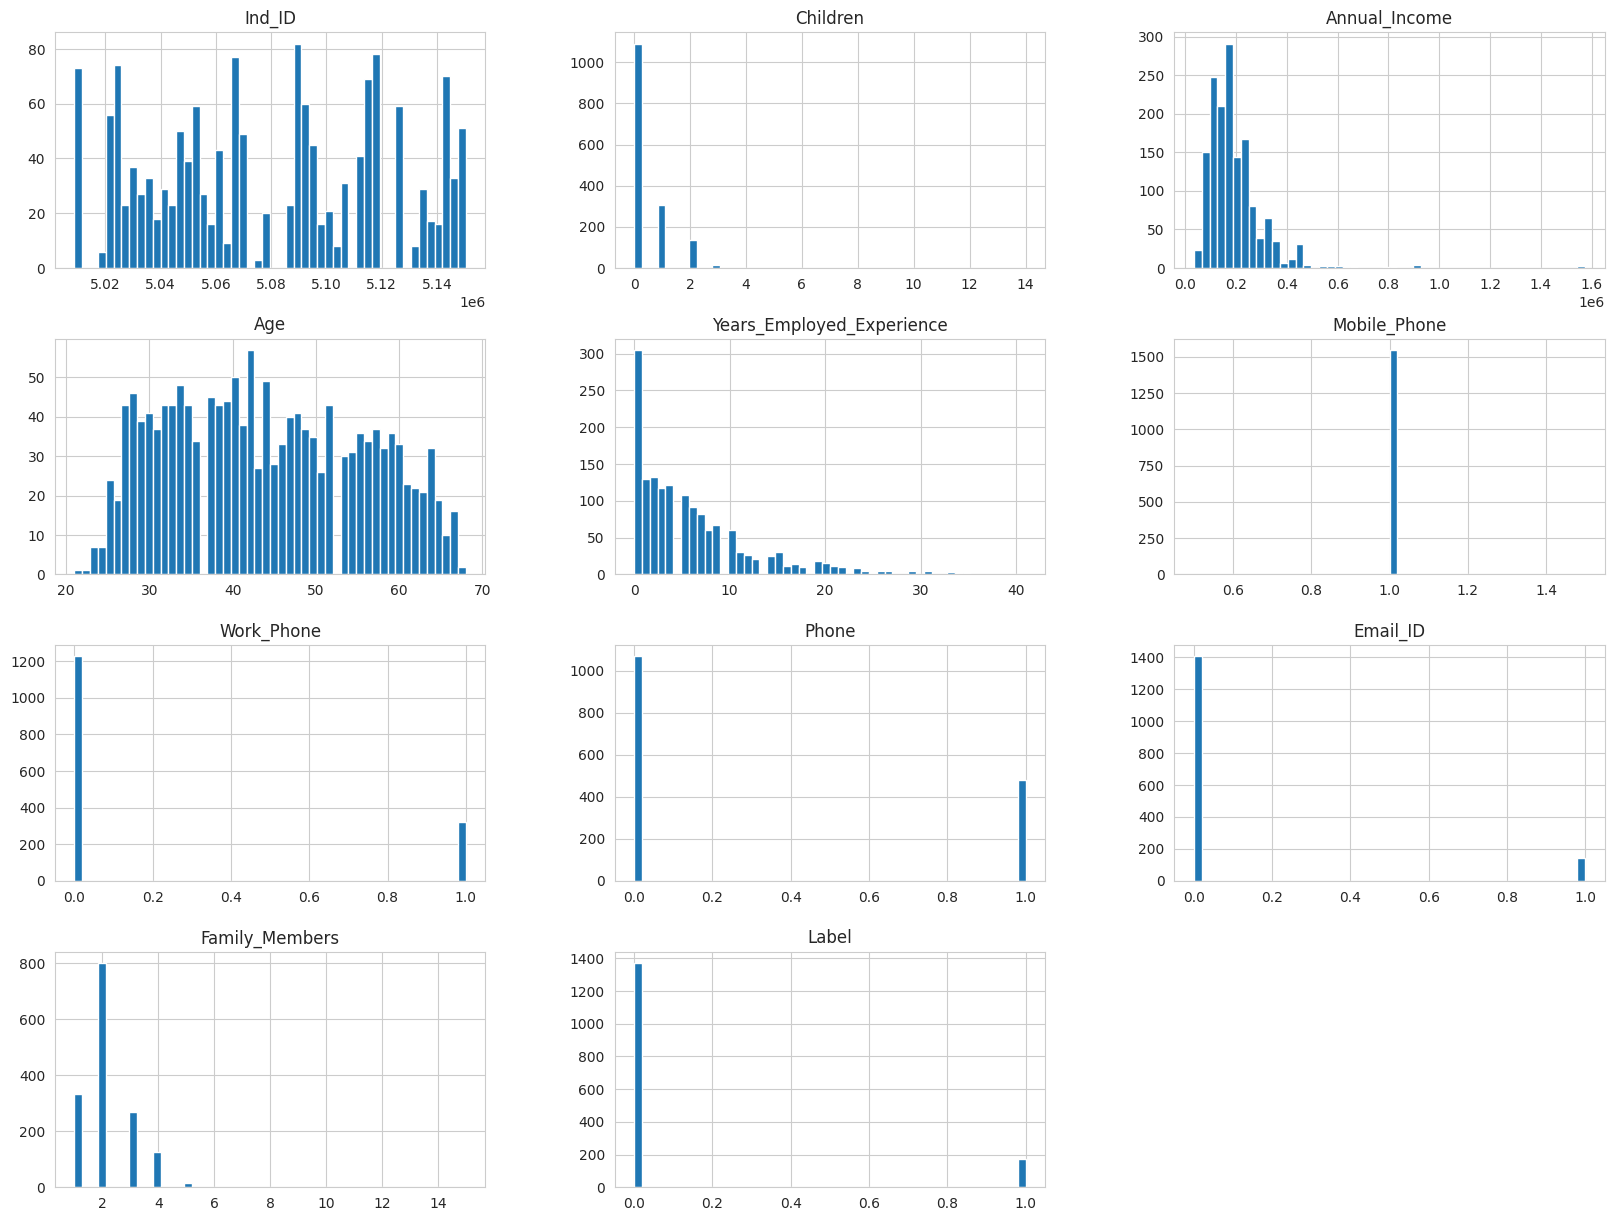

In [ ]:
# From the above code, that we can observe that null/missing values are present, to impute these missing values with
# mean or median or mode, we are checking for the outliers if present for numerical columns --> if present we impute them with median instead of mean
# obviously, for categorical we need to impute with mode values

# checking distribution of data using histogram plot

import pandas as pd                   # importing pandas library and given alias name as pd
import matplotlib.pyplot as plt       # importing matplotlib library and given alias name as plt
import seaborn as sns                 # importing seaborn library and given alias name as sns

df3.hist(bins=50, figsize=(20,15)) # this plots the histogram. Bins represents here that, 50 bins are equally spaced between minimum and maximum values
plt.show()                      # figsize gives the output's display figure size, here 20-->width and 15-->height

#**Explanation:**

From the above plots for the columns **Annual_Income** and **Age** which are numerical columns and having missing values are normally distributed by the observation of plots that means we cannot see much outliers in both the plots, therefore we can impute them with mean values. But again we will check using **boxplot** for clear confirmation.

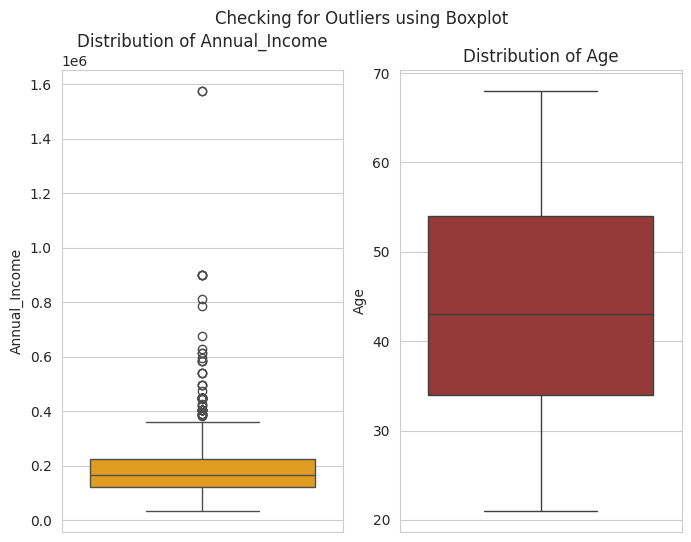

In [ ]:
# checking for outliers for two columns Annual_Income and Age as we need to impute missing values for these two columns only and
# not checking outliers for remaining columns which has missing values they are Gender and Type_Occupation because both are categorical columns

plt.figure(figsize=(8,6))


plt.subplot(1,2,1)
fig1 = sns.boxplot(df3["Annual_Income"], color="orange")
fig1.set(title="Distribution of Annual_Income")

plt.subplot(1,2,2)
fig2 = sns.boxplot(df3["Age"], color="brown")
fig2.set(title="Distribution of Age")


plt.suptitle("Checking for Outliers using Boxplot")
plt.show()

In [ ]:
# Impute Annual_Income column with median and treat outliers with IQR

In [ ]:
import pandas as pd                   # importing pandas library and given alias name as pd
import matplotlib.pyplot as plt       # importing matplotlib library and given alias name as plt
import seaborn as sns                 # importing seaborn library and given alias name as sns

# calculating average Annual_Income of the dataset using mean() function.

df3['Annual_Income'].median() # this gives the average median income of the dataset
                           # mean function is used to get average values of the dataset

166500.0

In [ ]:
import pandas as pd                   # importing pandas library and given alias name as pd
import matplotlib.pyplot as plt       # importing matplotlib library and given alias name as plt
import seaborn as sns                 # importing seaborn library and given alias name as sns

# calculating average Birthday_count of the dataset using mean() function.

df3['Age'].mean() # this gives the average median income of the dataset
                           # mean function is used to get average values of the dataset

43.952817824377455

In [ ]:
import pandas as pd                   # importing pandas library and given alias name as pd
import matplotlib.pyplot as plt       # importing matplotlib library and given alias name as plt
import seaborn as sns                 # importing seaborn library and given alias name as sns

# Knowing frequent value of column Type_Occupation of the dataset using mode() function.

df3['Type_Occupation'].mode()[0] # this gives the frequent value


'Laborers'

In [ ]:
import pandas as pd                   # importing pandas library and given alias name as pd
import matplotlib.pyplot as plt       # importing matplotlib library and given alias name as plt
import seaborn as sns                 # importing seaborn library and given alias name as sns

# Knowing frequent value of column GENDER of the dataset using mode() function.

df3['Gender'].mode()[0] # this gives the frequent value

'F'

In [ ]:
# filling the null/nan values of corona column using statistical approach mean since its a numerical column
df3["Annual_Income"]=df3["Annual_Income"].fillna(df3["Annual_Income"].median())

In [ ]:
# filling the null/nan values of corona column using statistical approach mean since its a numerical column
df3["Age"]=df3["Age"].fillna(df3["Age"].mean())

In [ ]:
# filling the null/nan values of corona column using statistical approach mode since its a categorical column
df3["Type_Occupation"]=df3["Type_Occupation"].fillna(df3["Type_Occupation"].mode()[0])

In [ ]:
# filling the null/nan values of corona column using statistical approach mode since its a categorical column
df3["Gender"]=df3["Gender"].fillna(df3["Gender"].mode()[0])

In [ ]:
df3.isnull().sum()  # Now, we see that there are no null values

Ind_ID                       0
Gender                       0
Car_Owner                    0
Property_Owner               0
Children                     0
Annual_Income                0
Type_Income                  0
Education                    0
Marital_Status               0
Housing_Type                 0
Age                          0
Years_Employed_Experience    0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Type_Occupation              0
Family_Members               0
Label                        0
dtype: int64

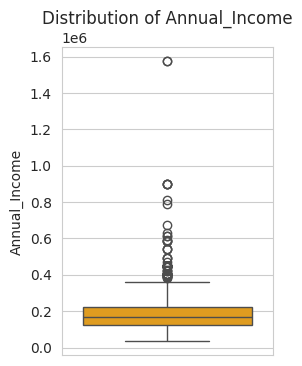

In [ ]:
# Again checking outliers after the Annual_Income column is imputed with median


plt.figure(figsize=(6,4))


plt.subplot(1,2,1)
fig1 = sns.boxplot(df3["Annual_Income"], color="orange")
fig1.set(title="Distribution of Annual_Income")

plt.show()

In [ ]:
# Treating the outliers in Annual_Income column with IQR

# lower limit= q1-1.5*IQR
# upper limit=q3+1.5*IQR

# Finding IQR
q1=df3.describe()["Annual_Income"]["25%"]
print("q1:", q1)
q3=df3.describe()["Annual_Income"]["75%"]
print("q3:", q3)

# Calculating IQR
# IQR=q3-q1
IQR=q3-q1
print("IQR:", IQR)

lower_limit_AnnualIncome= q1-1.5*IQR
print("Lower_Limit_AnnualIncome:", lower_limit_AnnualIncome)
upper_limit_AnnualIncome=q3+1.5*IQR
print("Upper_Limit_AnnualIncome:", upper_limit_AnnualIncome)

q1: 121500.0
q3: 225000.0
IQR: 103500.0
Lower_Limit_AnnualIncome: -33750.0
Upper_Limit_AnnualIncome: 380250.0


In [ ]:
# Finding outliers in Annual_Income column above the upper_limit_AnnualIncome

df3[df3["Annual_Income"] > upper_limit_AnnualIncome]

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
8     5010864      M         Y              Y         1       450000.0   
9     5010868      M         Y              Y         1       450000.0   
10    5010869      M         Y              Y         1       450000.0   
14    5021303      M         N              N         1       472500.0   
25    5024213      F         Y              Y         0       540000.0   
...       ...    ...       ...            ...       ...            ...   
1457  5095423      M         Y              Y         0       405000.0   
1467  5113401      M         Y              Y         0       450000.0   
1479  5126562      F         N              N         0       450000.0   
1495  5090302      F         N              Y         0       405000.0   
1538  5125816      F         Y              N         0       450000.0   

               Type_Income                      Education  \
8     Commercial associate  Secondary / secondary special   
9                Pensioner  Secondary / secondary special   
10    Commercial associate  Secondary / secondary special   
14               Pensioner               Higher education   
25    Commercial associate               Higher education   
...                    ...                            ...   
1457               Working               Higher education   
1467  Commercial associate               Higher education   
1479               Working               Higher education   
1495  Commercial associate  Secondary / secondary special   
1538             Pensioner               Higher education   

            Marital_Status       Housing_Type   Age  \
8                  Married  House / apartment  50.0   
9                  Married  House / apartment  50.0   
10    Single / not married  House / apartment  50.0   
14                 Married       With parents  24.0   
25                 Married  House / apartment  43.0   
...                    ...                ...   ...   
1457               Married  House / apartment  32.0   
1467  Single / not married  House / apartment  30.0   
1479               Married  House / apartment  30.0   
1495               Married  House / apartment  48.0   
1538               Married  House / apartment  54.0   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
8                           2.0             1           0      1         1   
9                           2.0             1           0      1         1   
10                          2.0             1           0      1         1   
14                          3.0             1           0      0         1   
25                          1.0             1           0      1         0   
...                         ...           ...         ...    ...       ...   
1457                        5.0             1           1      0         1   
1467                        2.0             1           0      0         1   
1479                        9.0             1           0      0         0   
1495                       13.0             1           0      0         1   
1538                       15.0             1           1      1         0   

     Type_Occupation  Family_Members  Label  
8         Core staff               3      1  
9         Core staff               3      1  
10        Core staff               1      1  
14          Laborers               3      1  
25          Laborers               2      1  
...              ...             ...    ...  
1457        Laborers               2      0  
1467     Sales staff               1      0  
1479     Sales staff               2      0  
1495     Sales staff               2      0  
1538        Managers               2      0  

[73 rows x 19 columns]

In [ ]:
# Finding outliers in Annual_Income column below the lower_limit_AnnualIncome

df3[df3["Annual_Income"] < lower_limit_AnnualIncome]

Empty DataFrame
Columns: [Ind_ID, Gender, Car_Owner, Property_Owner, Children, Annual_Income, Type_Income, Education, Marital_Status, Housing_Type, Age, Years_Employed_Experience, Mobile_Phone, Work_Phone, Phone, Email_ID, Type_Occupation, Family_Members, Label]
Index: []

In [ ]:
# creating a copy of original dataframe to treat outliers

df_outliers = df3.copy()


In [ ]:
df_outliers["Annual_Income"] = np.where(df_outliers["Annual_Income"] > upper_limit_AnnualIncome,
    upper_limit_AnnualIncome, np.where(df_outliers["Annual_Income"] < lower_limit_AnnualIncome,
                                       lower_limit_AnnualIncome,  df_outliers["Annual_Income"]))


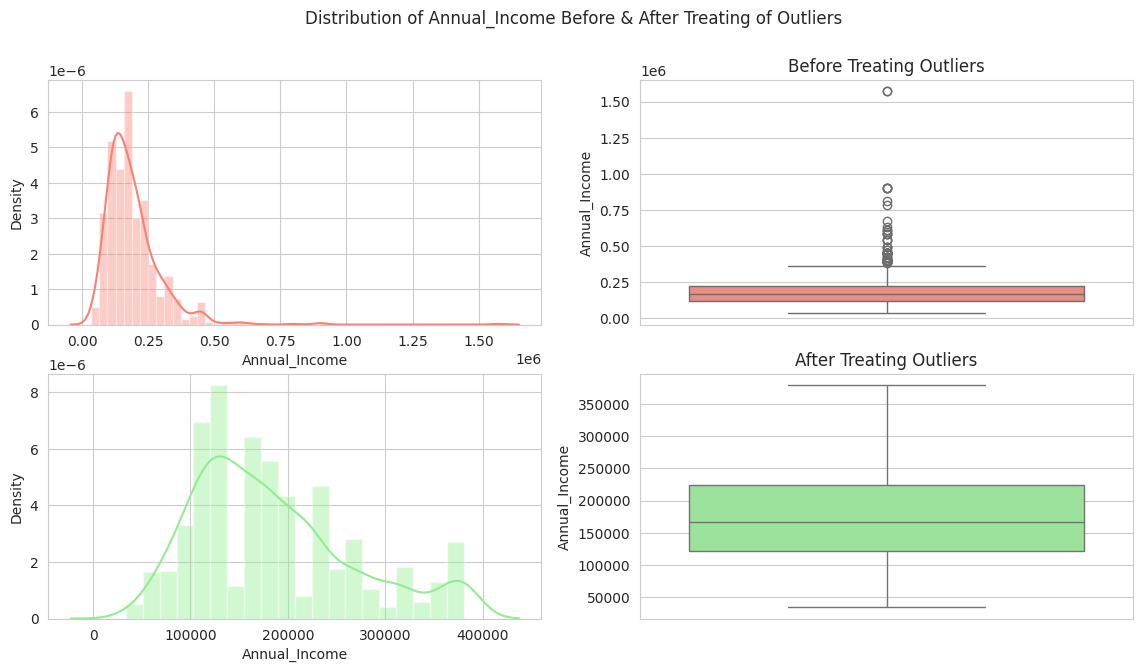

In [ ]:
# Comparing the outliers of Annual_Income column before and after treating ouliers.

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Annual_Income Before & After Treating of Outliers')
fig1 = sns.distplot(df3["Annual_Income"], color="salmon")


plt.subplot(2,2,2)
fig1 = sns.boxplot(df3["Annual_Income"], color="salmon")
fig1.set(title="Before Treating Outliers")

plt.subplot(2,2,3)
fig2 = sns.distplot(df_outliers["Annual_Income"], color="lightgreen")


plt.subplot(2,2,4)
fig2 = sns.boxplot(df_outliers["Annual_Income"], color="lightgreen")
fig2.set(title="After Treating Outliers")

plt.show()

#**Explanation :**

From the above observation, we can say that the missing values of Annual_Income column are imputed with median as it has outliers and after imputed missing values with median values, outliers are treated with IQR and made Annual_Income normally distributed column and before not treating the outliers Annual_Income column is not normally distributed.

In [ ]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1548 non-null   object 
 2   Car_Owner                  1548 non-null   object 
 3   Property_Owner             1548 non-null   object 
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1548 non-null   float64
 6   Type_Income                1548 non-null   object 
 7   Education                  1548 non-null   object 
 8   Marital_Status             1548 non-null   object 
 9   Housing_Type               1548 non-null   object 
 10  Age                        1548 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

In [ ]:
df_outliers.isnull().sum()

Ind_ID                       0
Gender                       0
Car_Owner                    0
Property_Owner               0
Children                     0
Annual_Income                0
Type_Income                  0
Education                    0
Marital_Status               0
Housing_Type                 0
Age                          0
Years_Employed_Experience    0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Type_Occupation              0
Family_Members               0
Label                        0
dtype: int64

In [ ]:
# creating a copy of dataframe where "df" is cleaned dataset

df = df_outliers.copy()


In [ ]:
df.head(5)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

         Age  Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  \
0  51.000000                        0.0             1           0      0   
1  37.000000                        2.0             1           1      1   
2  43.952818                        2.0             1           1      1   
3  37.000000                        2.0             1           1      1   
4  37.000000                        2.0             1           1      1   

   Email_ID Type_Occupation  Family_Members  Label  
0         0        Laborers               2      1  
1         0        Laborers               2      1  
2         0        Laborers               2      1  
3         0        Laborers               2      1  
4         0        Laborers               2      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1548 non-null   object 
 2   Car_Owner                  1548 non-null   object 
 3   Property_Owner             1548 non-null   object 
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1548 non-null   float64
 6   Type_Income                1548 non-null   object 
 7   Education                  1548 non-null   object 
 8   Marital_Status             1548 non-null   object 
 9   Housing_Type               1548 non-null   object 
 10  Age                        1548 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

In [ ]:
df.isnull().sum()

Ind_ID                       0
Gender                       0
Car_Owner                    0
Property_Owner               0
Children                     0
Annual_Income                0
Type_Income                  0
Education                    0
Marital_Status               0
Housing_Type                 0
Age                          0
Years_Employed_Experience    0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Type_Occupation              0
Family_Members               0
Label                        0
dtype: int64

#**Exploratory Data Analysis**

**Univariate Analysis :**

1. qualitative data, categorical data - nominal data(gender, city), ordinal
   data(grades, qualification)

2. quantitative data, nuemrical data - continous( height, weight,age..),
   discrete(no of students in a class, number of passengers in abus , )

* Categorical data(only one column) - barplot, countplot, piechart.......

* Numerical data(only one column) - histogram, distplot, boxplot

**bi or multivariate analysis :**

* Numerical-numerical columns- scatterplot, regplot,lineplot

* categorical-numerical=boxplot,barplot,violinplot,catplot

* cat-cat=crosstab, or heatmap

In [ ]:
df.head(5)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

         Age  Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  \
0  51.000000                        0.0             1           0      0   
1  37.000000                        2.0             1           1      1   
2  43.952818                        2.0             1           1      1   
3  37.000000                        2.0             1           1      1   
4  37.000000                        2.0             1           1      1   

   Email_ID Type_Occupation  Family_Members  Label  
0         0        Laborers               2      1  
1         0        Laborers               2      1  
2         0        Laborers               2      1  
3         0        Laborers               2      1  
4         0        Laborers               2      1

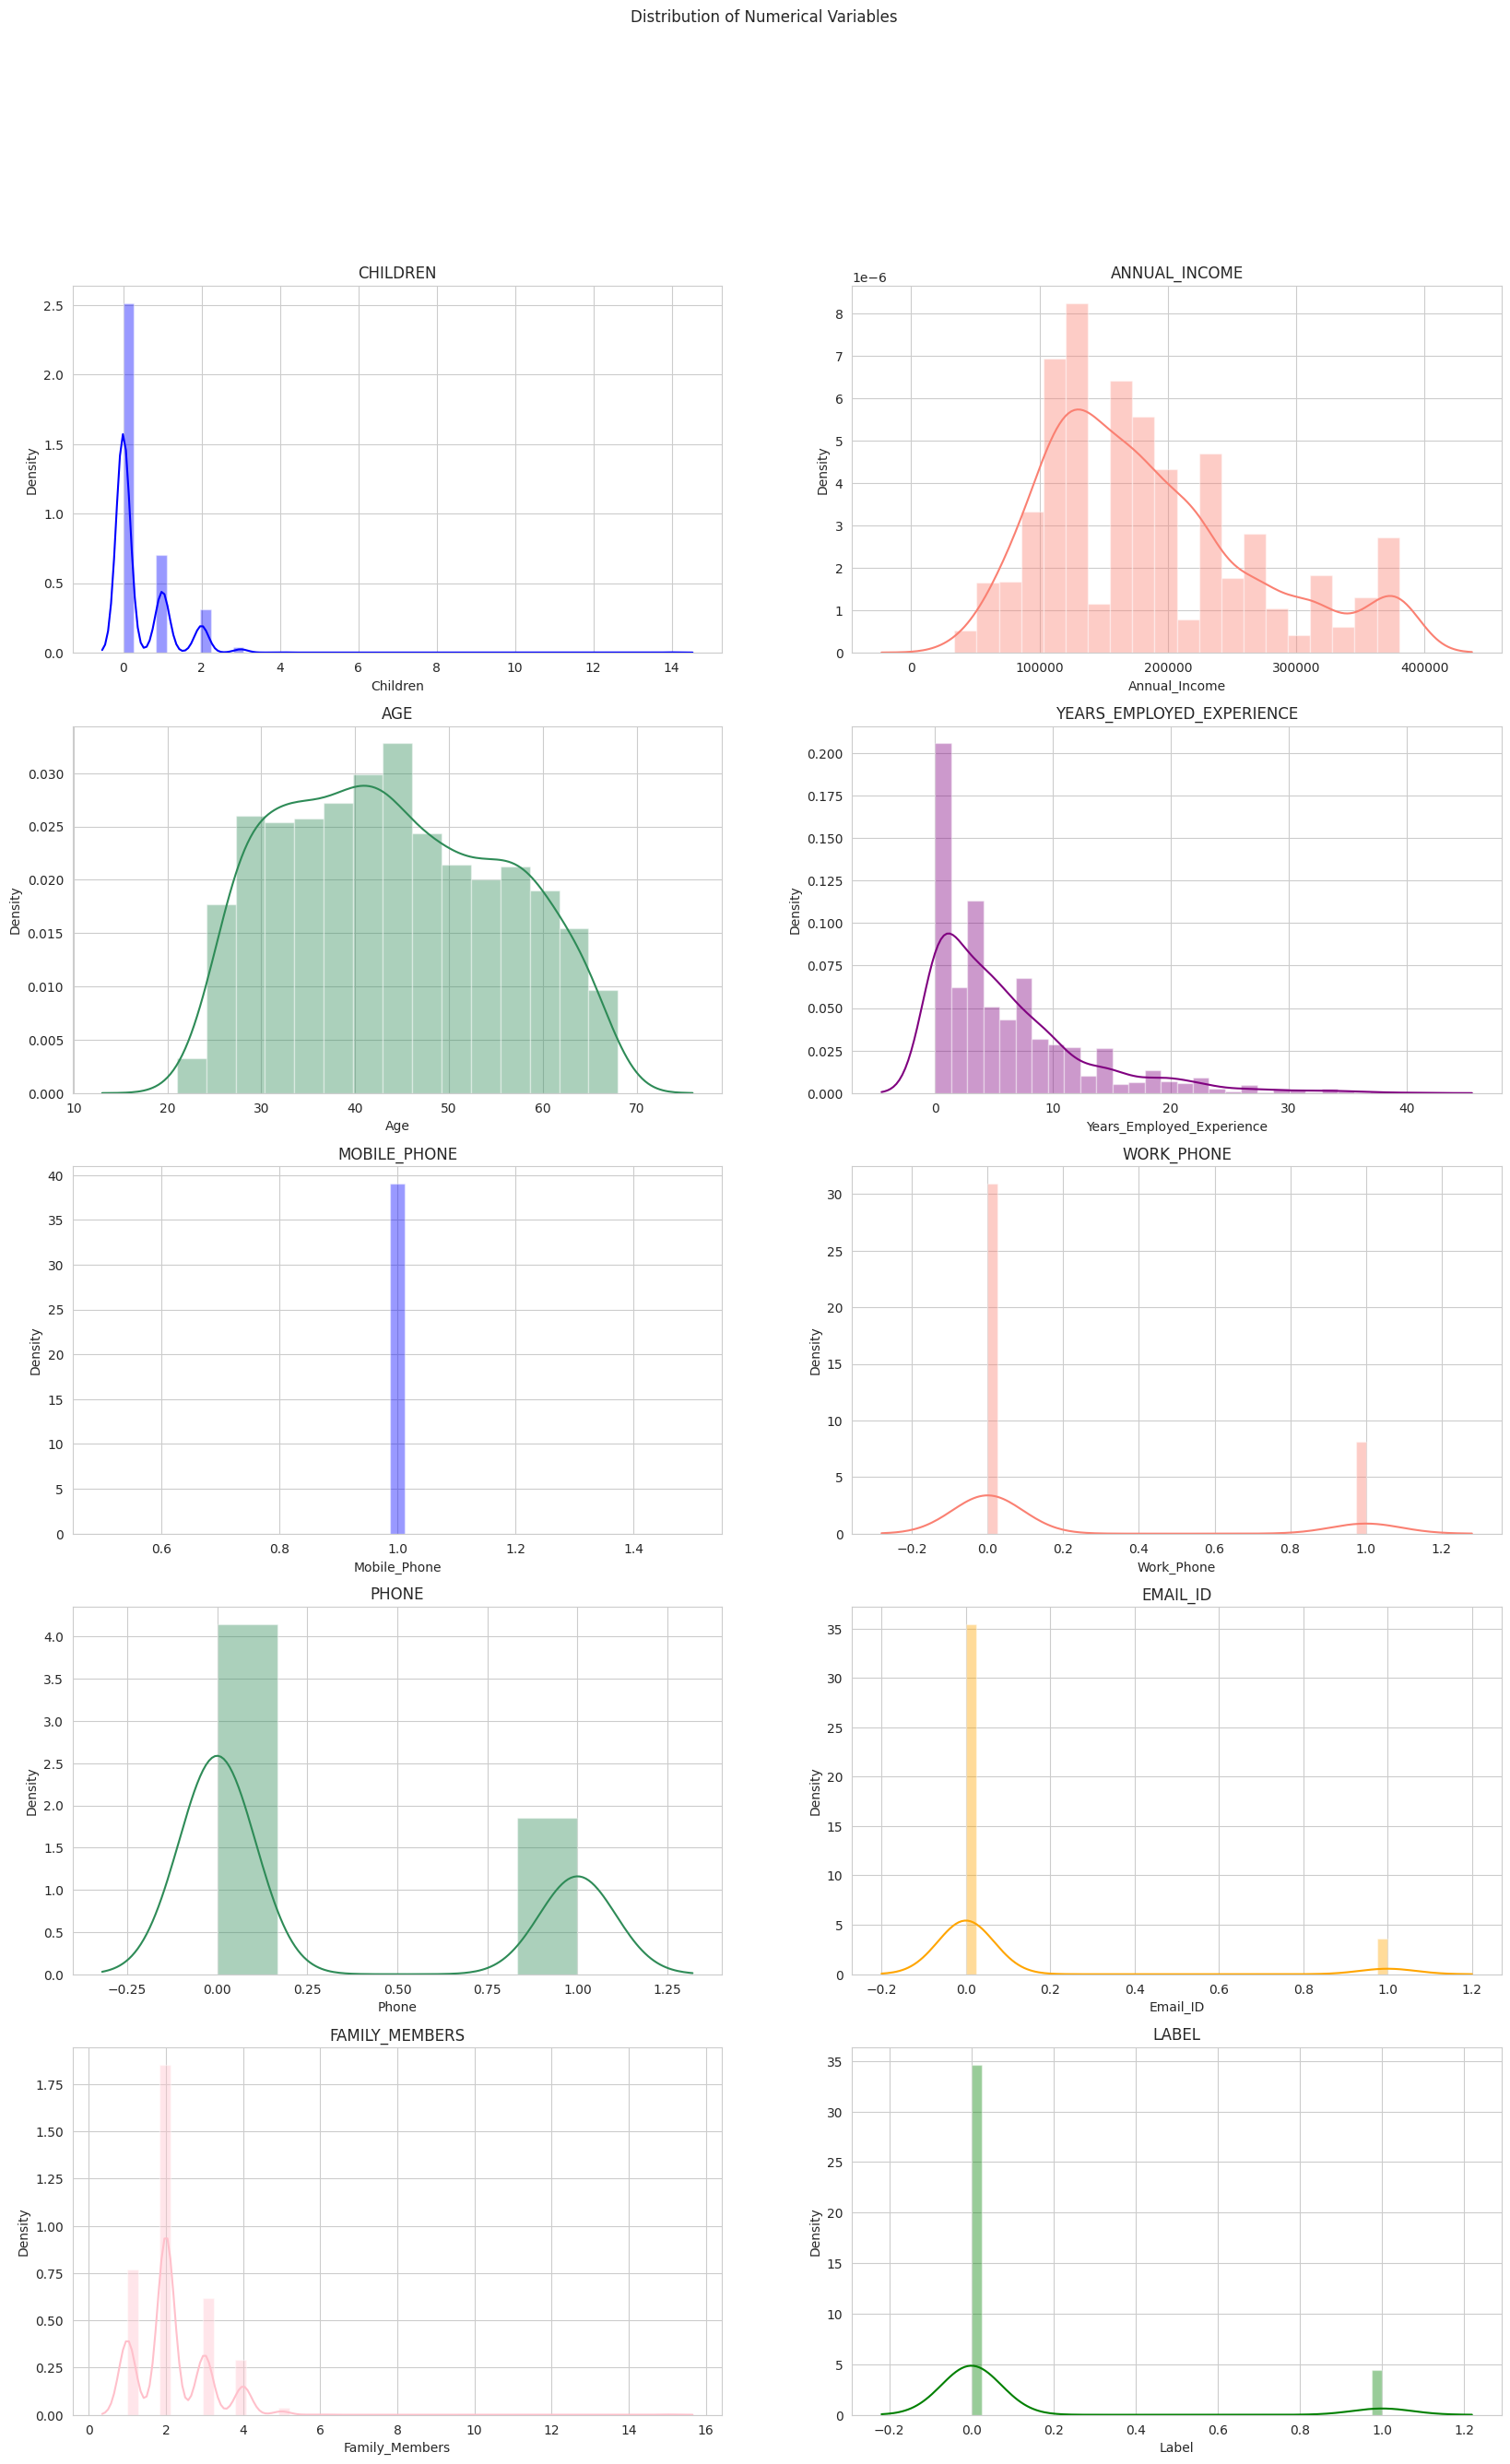

In [ ]:
# checking the distribution of numerical columns

plt.figure(figsize=(20, 30))
plt.subplot(5,2,1)
plt.suptitle("Distribution of Numerical Variables")
fig1=sns.distplot(df['Children'], color="blue")
fig1.set(title="CHILDREN")

plt.subplot(5,2,2)
fig2=sns.distplot(df["Annual_Income"], color="salmon")
fig2.set(title="ANNUAL_INCOME")

plt.subplot(5,2,3)
fig3=sns.distplot(df["Age"], color="seagreen")
fig3.set(title="AGE")

plt.subplot(5,2,4)
fig4=sns.distplot(df["Years_Employed_Experience"], color="purple")
fig4.set(title="YEARS_EMPLOYED_EXPERIENCE")


plt.subplot(5,2,5)
fig5=sns.distplot(df["Mobile_Phone"], color="blue")
fig5.set(title="MOBILE_PHONE")


plt.subplot(5,2,6)
fig5=sns.distplot(df["Work_Phone"], color="salmon")
fig5.set(title="WORK_PHONE")


plt.subplot(5,2,7)
fig6=sns.distplot(df["Phone"], color="seagreen")
fig6.set(title="PHONE")


plt.subplot(5,2,8)
fig7=sns.distplot(df["Email_ID"], color="orange")
fig7.set(title="EMAIL_ID")



plt.subplot(5,2,9)
fig8=sns.distplot(df["Family_Members"], color="pink")
fig8.set(title="FAMILY_MEMBERS")


plt.subplot(5,2,10)
fig9=sns.distplot(df["Label"], color="green")
fig9.set(title="LABEL")

plt.show()

In [ ]:
# checking the distribution of categorical columns

plt.figure(figsize=(26,32))
plt.subplot(4,2,1)
plt.suptitle("Distribution of Categorical Variables")
fig1=sns.countplot(x=df["Gender"], palette="YlOrBr")
fig1.set(title="Gender Distribution")
fig1.bar_label(fig1.containers[0])  # which gives count values on bar
fig1.bar_label(fig1.containers[1])

plt.subplot(4,2,2)
fig2=sns.countplot(x=df["Car_Owner"], palette="BuGn")
fig2.set(title="Car_Owner Distribution")
# Labeling each bar individually
for container in fig2.containers:
    fig2.bar_label(container)

plt.subplot(4,2,3)
fig3=sns.countplot(x=df["Property_Owner"], palette="PuRd")
fig3.set(title="Property_Owner Distribution")
# Labeling each bar individually
for container in fig3.containers:
    fig3.bar_label(container)

plt.subplot(4,2,4)
fig4=sns.countplot(x=df["Type_Income"], palette="YlOrBr")
fig4.set(title="Type_Income Distribution")
# Labeling each bar individually
for container in fig4.containers:
    fig4.bar_label(container)

plt.subplot(4,2,5)
fig5=sns.countplot(x=df["Education"], palette="BuGn")
fig5.set(title="Education Distribution")
# Labeling each bar individually
for container in fig5.containers:
    fig5.bar_label(container)

plt.subplot(4,2,6)
fig6=sns.countplot(x=df["Marital_Status"], palette="PuRd")
fig6.set(title="Marital_Status Distribution")
# Labeling each bar individually
for container in fig6.containers:
    fig6.bar_label(container)

plt.subplot(4,2,7)
fig7=sns.countplot(x=df["Housing_Type"], palette="YlGnBu")
fig7.set(title="Housing_Type Distribution")
fig7.set_xticklabels(fig7.get_xticklabels(), rotation=90)  # Rotate labels by 90 degrees
# Labeling each bar individually
for container in fig7.containers:
    fig7.bar_label(container)

plt.subplot(4,2,8)
fig8=sns.countplot(x=df["Type_Occupation"], palette="RdBu")
fig8.set(title="Type_Occupation Distribution")
fig8.set_xticklabels(fig8.get_xticklabels(), rotation=90)  # Rotate labels by 90 degrees
# Labeling each bar individually
for container in fig8.containers:
    fig8.bar_label(container)

plt.show()

#**Explanation :**

From the above obsevations, we can say that most of the applicants who applied for the credit card approval are females, many not a car owners, many has property, many has income type working, many has education as secondary/secondary special, many has marital status as married, many has living style/housing_type as house/appartment and many has type of occupation as laborers.

In [ ]:
df["Gender"].value_counts()

Gender
F    980
M    568
Name: count, dtype: int64

In [ ]:
df["Type_Occupation"].unique()

array(['Laborers', 'Core staff', 'Cooking staff', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
df["Type_Occupation"].value_counts()

Type_Occupation
Laborers                 756
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [ ]:
df["Label"].value_counts()

Label
0    1373
1     175
Name: count, dtype: int64

In [ ]:
df["Children"].value_counts()

Children
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64

In [ ]:
# checking the distribution of gender and age columns
# boxplot - bivariate analysis of categorical - Gender  and numerical - Age columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization

plt.figure(figsize=(6,4)) # giving the figure size (width, height)

fig1=sns.boxplot(data=df, x="Gender", y="Age", palette="BuGn")
fig1.set(title="Distribution of gender by age")

plt.show()


#**Explanation :**

From the above plot, we can say that the males are in the age group of 30 to 50 and females are in the age group of 35 to 55, who are applied for the approval of credit card.

In [ ]:
# the same above code distribution of gender by age is done using plotly library for more interative visualization

import plotly.express as px  # or from plotly import express as px
import pandas as pd

plt.figure(figsize=(6,4))
fig = px.box(df, x="Gender", y="Age", title="Distribution of gender by age", color="Gender")
#fig.update_traces(marker=dict(color='green'))  # Customize marker color --> This gives green color for both male and female
fig.show()

<Figure size 600x400 with 0 Axes>

In [ ]:
# checking the Annual_Income of the applicants by Gender
# boxplot - bivariate analysis of categorical - Gender  and numerical - Annual_Income columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Create violin plot
fig_violin = px.violin(df, x="Gender", y="Annual_Income", color="Gender")
fig_violin.update_layout(title="Violin Plot")

# Create box plot
fig_box = px.box(df, x="Gender", y="Annual_Income", color="Gender")
fig_box.update_layout(title="Box Plot")

# Display both plots side by side
fig_violin.show()
fig_box.show()




In [ ]:
# same above code only, checking the Annual_Income of the applicants by Gender. But used both violin and box plots like comparision so to understand myself the values
# violinplot - bivariate analysis of categorical - Gender  and numerical - Annual_Income columns
# boxplot - bivariate analysis of categorical - Gender  and numerical - Annual_Income columns

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create violin plot
fig_violin = px.violin(df, x="Gender", y="Annual_Income", color="Gender")
fig_violin.update_layout(title="Violin Plot")

# Create box plot
fig_box = px.box(df, x="Gender", y="Annual_Income", color="Gender")
fig_box.update_layout(title="Box Plot")

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Violin Plot", "Box Plot"))

# Add violin plot to the first subplot
for trace in fig_violin.data:
    fig.add_trace(trace, row=1, col=1)

# Add box plot to the second subplot
for trace in fig_box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(title="Violin and Box Plot Comparison", showlegend=True)

fig.show()


In [ ]:
# checking same above code using seaborn library

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization

plt.figure(figsize=(6,4)) # giving the figure size (width, height)

fig1=sns.boxplot(data=df, x="Gender", y="Annual_Income", palette="BuGn")
fig1.set(title="Distribution of gender by Annual_Income")

plt.show()

#**Explanation :**

From the above plots, we can say that the annual income for males are in range of 148k to 270k and annual income for females are in the range of 112k to 202k with some outliers.

So, in general the male applicants are applied for credit card having income range high when compared to females

#**Note :** (For my unserstanding)

**why even i have treated outliers with IQR for Annual_Income column still its showing outliers when I do biavariate analysing for gender which is categorical column and annual_income which is numerical column?**

**Answer:**

Treating outliers using the interquartile range (IQR) involves identifying and potentially removing or adjusting data points that lie outside a certain range determined by the IQR method. However, it's possible that after applying outlier treatment, some data points may still be identified as outliers in certain analyses, especially when combining with categorical variables like "Gender" in your case.

Here are a few possible reasons why you might still see outliers in your bivariate analysis:

1. Distribution Across Categories:

  The distribution of "Annual_Income" values might differ significantly between different categories of the "Gender" variable. Even after removing outliers based on the overall distribution of "Annual_Income", some values within specific categories of "Gender" may still be considered outliers.

2. Differences in Group Sizes:
  
  If the number of data points in each category of the "Gender" variable is different, the statistical properties of the data within each category may vary, potentially leading to the identification of outliers within each category.

3. Outlier Definition:

  The definition of an outlier can vary depending on the context and the specific method used for outlier detection. Even though you treated outliers using the IQR method, the threshold for defining outliers (e.g., 1.5 * IQR) may still identify some data points as outliers based on their deviation from the category-specific distributions.

4. Visualization Methods:
   
   Different visualization methods may highlight outliers differently. While box plots and violin plots commonly used for bivariate analysis can help identify outliers, they may not capture all nuances in the data distribution, especially within different categories of a categorical variable.

**To better understand why outliers are still present in your bivariate analysis, you may consider :**

* Examining the distribution of "Annual_Income" within each category of the
  "Gender" variable separately.

* Adjusting outlier treatment methods, if necessary, to account for
  category-specific distributions.

* Exploring alternative visualization methods or statistical techniques to
  assess the impact of outliers on your analysis.





In [ ]:
# checking Annual_Income of applicants based on education
# gender vs propertyowner, gender vs carowner

# boxplot - bivariate analysis of categorical - Education  and numerical - Annual_Income columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Create box plot
plt.figure(figsize=(8,4))
fig = px.box(df, x="Education", y="Annual_Income", color="Education")
fig.update_layout(title="Distribution of annual_income of applicants based on education")

fig.show()



<Figure size 800x400 with 0 Axes>

#**Explanation :**

From the above plot, we can say that the applicants with academic degree education having high annual income.

In [ ]:
# checking distribution of Type_Income by gender with Housing_Type using plotly library

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame containing the data

# Group the data by Type_Income, Gender, and Housing_Type and count occurrences
grouped_df = df.groupby(['Type_Income', 'Gender', 'Housing_Type']).size().reset_index(name='Count')

# Create grouped bar chart
fig_bar = px.bar(grouped_df, x='Type_Income', y='Count', color='Housing_Type', barmode='group', facet_row='Gender')
fig_bar.update_layout(title='Distribution of Type_Income by Gender with Housing_Type')
fig_bar.show()



In [ ]:
grouped_df

Type_Income Gender         Housing_Type  Count
0   Commercial associate      F    House / apartment    197
1   Commercial associate      F  Municipal apartment      4
2   Commercial associate      F     Office apartment      1
3   Commercial associate      F     Rented apartment      1
4   Commercial associate      F         With parents     14
5   Commercial associate      M    House / apartment    125
6   Commercial associate      M  Municipal apartment      8
7   Commercial associate      M     Office apartment      1
8   Commercial associate      M     Rented apartment      5
9   Commercial associate      M         With parents      9
10             Pensioner      F    House / apartment    204
11             Pensioner      F  Municipal apartment     15
12             Pensioner      M    House / apartment     47
13             Pensioner      M  Municipal apartment      1
14             Pensioner      M     Rented apartment      1
15             Pensioner      M         With parents      1
16         State servant      F    House / apartment     68
17         State servant      F  Municipal apartment      3
18         State servant      F     Office apartment      1
19         State servant      F     Rented apartment      1
20         State servant      F         With parents      4
21         State servant      M      Co-op apartment      2
22         State servant      M    House / apartment     32
23         State servant      M  Municipal apartment      2
24         State servant      M     Rented apartment      1
25         State servant      M         With parents      2
26               Working      F      Co-op apartment      3
27               Working      F    House / apartment    423
28               Working      F  Municipal apartment     11
29               Working      F     Office apartment      1
30               Working      F     Rented apartment      4
31               Working      F         With parents     25
32               Working      M    House / apartment    284
33               Working      M  Municipal apartment      9
34               Working      M     Office apartment      5
35               Working      M     Rented apartment      8
36               Working      M         With parents     25

<Figure size 1000x600 with 0 Axes>

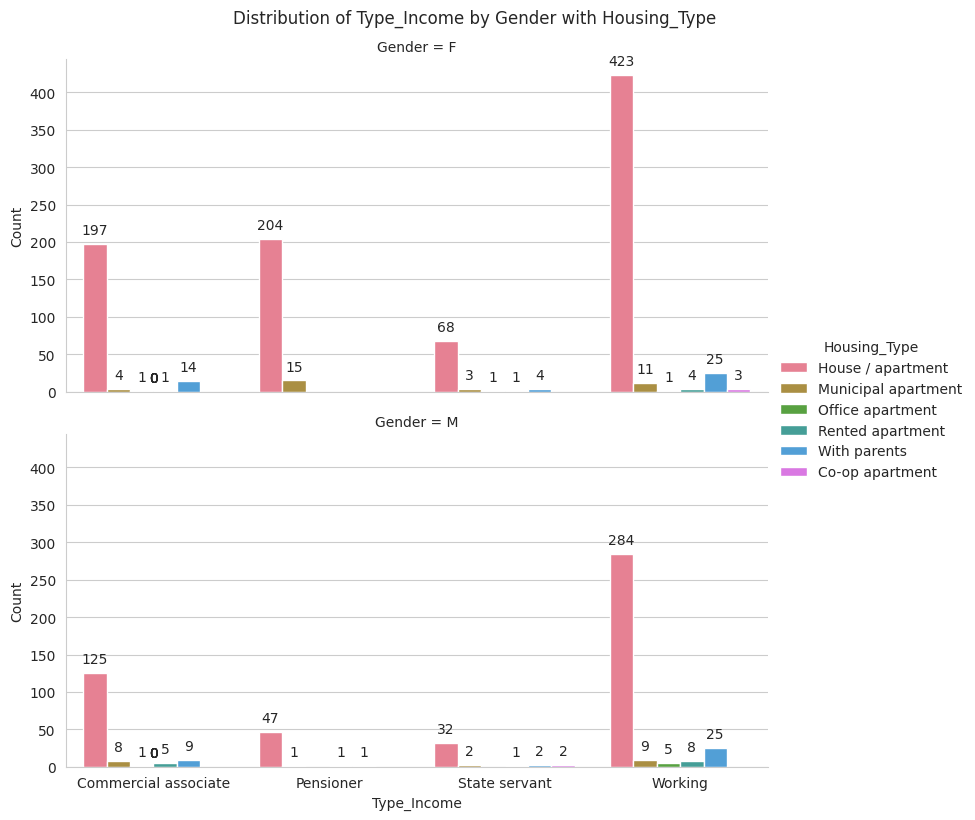

In [ ]:
# checking distribution of Type_Income by gender with Housing_Type using seaborn library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Group the data by Type_Income, Gender, and Housing_Type and count occurrences
grouped_df = df.groupby(['Type_Income', 'Gender', 'Housing_Type']).size().reset_index(name='Count')

# Set the style and context for seaborn
sns.set_style("whitegrid")

# Create the grouped bar chart with facet grid
g = sns.FacetGrid(grouped_df, row='Gender', height=4, aspect=2)
g.map_dataframe(sns.barplot, x='Type_Income', y='Count', hue='Housing_Type', ci=None, palette='husl')
g.set_axis_labels('Type_Income', 'Count')
g.add_legend(title='Housing_Type')

# Labeling each bar individually
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

plt.suptitle('Distribution of Type_Income by Gender with Housing_Type', y=1.02)
plt.show()


# **Explanation :**

From the above graph, we can say that the most of the applicants either male or female applied for credit credit card approval having type_income as working, having housing_type as house/appartment and in this applicants between male and female, most of the applicants are female.

In [ ]:
df.head(5)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

         Age  Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  \
0  51.000000                        0.0             1           0      0   
1  37.000000                        2.0             1           1      1   
2  43.952818                        2.0             1           1      1   
3  37.000000                        2.0             1           1      1   
4  37.000000                        2.0             1           1      1   

   Email_ID Type_Occupation  Family_Members  Label  
0         0        Laborers               2      1  
1         0        Laborers               2      1  
2         0        Laborers               2      1  
3         0        Laborers               2      1  
4         0        Laborers               2      1

In [ ]:
# checking credit card approval based on gender

# boxplot or barplot - bivariate analysis of categorical - Gender  and numerical - Label columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization


plt.figure(figsize=(8,4))
# Group the data by Label and Gender and count occurrences
grouped_df = df.groupby(['Label', 'Gender']).size().reset_index(name='Count')

# Create grouped bar chart
fig_bar = px.bar(grouped_df, x='Gender', y='Count', color='Label', barmode='group',
                 labels={'Gender': 'Gender', 'Count': 'Count', 'Label': 'Credit Card Approval'})
fig_bar.update_layout(title='Distribution of Credit Card Approval based on Gender')
fig_bar.show()


<Figure size 800x400 with 0 Axes>

#**Explanation :**

From the above plot, we can say that most of the credit cards are approved for the females when compared to the males. And also observed that most of the applicants are also females who applied for credit cards.

In [ ]:
# checking applicants Annual_Income based on their work experience (Years_Employed_Experience)


# scatterplot - bivariate analysis of numerical - Annual_Income  and numerical - Years_Employed_Experience columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Create scatter plot
plt.figure(figsize=(8,4))
fig = px.scatter(df, x="Years_Employed_Experience", y="Annual_Income")
fig.update_layout(title="Distribution of annual_income of applicants based on their years_employed_experience")

fig.show()


<Figure size 800x400 with 0 Axes>

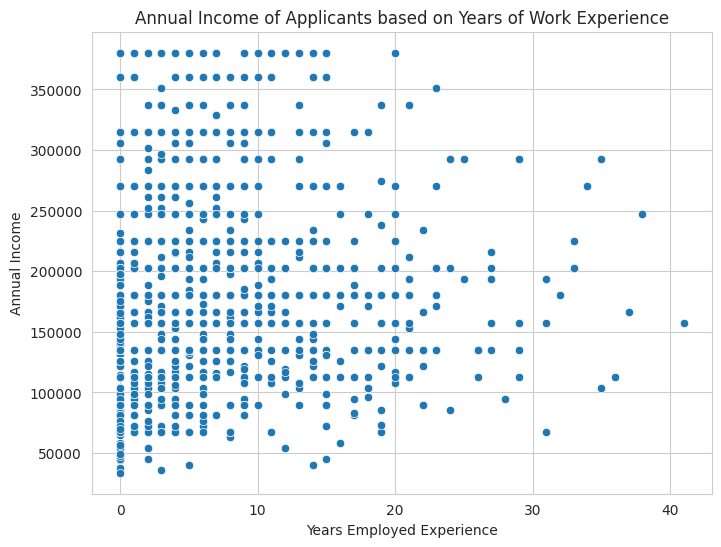

In [ ]:
# checking applicants Annual_Income based on their work experience (Years_Employed_Experience) -- same above code only but done using seaborn library

# scatterplot - bivariate analysis of numerical - Annual_Income  and numerical - Years_Employed_Experience columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Set the style and context for seaborn
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Years_Employed_Experience', y='Annual_Income')
plt.title('Annual Income of Applicants based on Years of Work Experience')
plt.xlabel('Years Employed Experience')
plt.ylabel('Annual Income')
plt.show()


#**Explanation :**

From the above plot, we can say that most of the applicants who applied for the credit credit approval are with work experience below 35 years. And also observed that annual_income is not same for every applicant with regard to the work experience. That means the role of job may be different even the work eperience is same, if we see applicant with less annaul income even the applicant has same work experience when compared to the other applicant with same work experience having high annual income.

In [ ]:
# checking Annual_Income of applicants based on family members

# scatterplot - bivariate analysis of numerical - Family_Members   and numerical - Annual_Income columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Create scatter plot
plt.figure(figsize=(8,4))
fig = px.scatter(df, x="Family_Members", y="Annual_Income")
fig.update_layout(title="Distribution of annual_income of applicants based on their family_members")

fig.show()


<Figure size 800x400 with 0 Axes>

#**Explanation :**

From the above plot, we can say that most the applicants are having family_members below 6 are applied for the credit card approval.

In [ ]:
# checking annual_income based on the type_oocupation

# boxplot - bivariate analysis of categorical - Type_Occupation   and numerical - Annual_Income columns

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization
import plotly.express as px          # importing plotly library and giving aliasing name as px --> for visualization

# Create box plot
plt.figure(figsize=(8,4))
fig = px.box(df, x="Type_Occupation", y="Annual_Income", color="Type_Occupation")
fig.update_layout(title="Distribution of annual_income of applicants based on their type_occupation")

fig.show()

<Figure size 800x400 with 0 Axes>

#**Explanation :**

From the above graph, we can observe that the applicants with type of occupation as managers has high annual_income when comapared to other occupations.

In [ ]:
# checking the correlation between variables using spearman rank correlation
numeric_df = df.select_dtypes(include=['number'])
df_corr = numeric_df.corr(method='spearman')
df_corr

Ind_ID  Children  Annual_Income       Age  \
Ind_ID                     1.000000  0.028212      -0.010654 -0.021314   
Children                   0.028212  1.000000       0.065619 -0.335653   
Annual_Income             -0.010654  0.065619       1.000000 -0.110444   
Age                       -0.021314 -0.335653      -0.110444  1.000000   
Years_Employed_Experience  0.022135  0.156268       0.168064 -0.195644   
Mobile_Phone                    NaN       NaN            NaN       NaN   
Work_Phone                 0.085486  0.039430      -0.069833 -0.163614   
Phone                      0.005962  0.016628      -0.016990  0.032810   
Email_ID                  -0.040371  0.058465       0.119163 -0.163778   
Family_Members             0.009687  0.814579       0.041022 -0.275409   
Label                      0.016414 -0.016235       0.005971  0.045327   

                           Years_Employed_Experience  Mobile_Phone  \
Ind_ID                                      0.022135           NaN   
Children                                    0.156268           NaN   
Annual_Income                               0.168064           NaN   
Age                                        -0.195644           NaN   
Years_Employed_Experience                   1.000000           NaN   
Mobile_Phone                                     NaN           NaN   
Work_Phone                                  0.157747           NaN   
Phone                                       0.008579           NaN   
Email_ID                                   -0.005983           NaN   
Family_Members                              0.181474           NaN   
Label                                      -0.102582           NaN   

                           Work_Phone     Phone  Email_ID  Family_Members  \
Ind_ID                       0.085486  0.005962 -0.040371        0.009687   
Children                     0.039430  0.016628  0.058465        0.814579   
Annual_Income               -0.069833 -0.016990  0.119163        0.041022   
Age                         -0.163614  0.032810 -0.163778       -0.275409   
Years_Employed_Experience    0.157747  0.008579 -0.005983        0.181474   
Mobile_Phone                      NaN       NaN       NaN             NaN   
Work_Phone                   1.000000  0.352439 -0.009594        0.086419   
Phone                        0.352439  1.000000  0.018105        0.021121   
Email_ID                    -0.009594  0.018105  1.000000        0.056622   
Family_Members               0.086419  0.021121  0.056622        1.000000   
Label                       -0.007046 -0.000664  0.012921       -0.026446   

                              Label  
Ind_ID                     0.016414  
Children                  -0.016235  
Annual_Income              0.005971  
Age                        0.045327  
Years_Employed_Experience -0.102582  
Mobile_Phone                    NaN  
Work_Phone                -0.007046  
Phone                     -0.000664  
Email_ID                   0.012921  
Family_Members            -0.026446  
Label                      1.000000

In [ ]:
# using heatmap for finding correlation between the features
# heatmap is used only for numerical columns --> For visualization we use heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="flare")
plt.title("Correlation Matrix")
plt.show()


# **Machine Learning - Model Training**

In [ ]:
df4 = df.copy() # creating a df4 dataframe a copy of df dataframe to perform machine learning algorithms
df4.head(5)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

         Age  Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  \
0  51.000000                        0.0             1           0      0   
1  37.000000                        2.0             1           1      1   
2  43.952818                        2.0             1           1      1   
3  37.000000                        2.0             1           1      1   
4  37.000000                        2.0             1           1      1   

   Email_ID Type_Occupation  Family_Members  Label  
0         0        Laborers               2      1  
1         0        Laborers               2      1  
2         0        Laborers               2      1  
3         0        Laborers               2      1  
4         0        Laborers               2      1

In [ ]:
df4.isnull().sum()

Ind_ID                       0
Gender                       0
Car_Owner                    0
Property_Owner               0
Children                     0
Annual_Income                0
Type_Income                  0
Education                    0
Marital_Status               0
Housing_Type                 0
Age                          0
Years_Employed_Experience    0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Type_Occupation              0
Family_Members               0
Label                        0
dtype: int64

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1548 non-null   object 
 2   Car_Owner                  1548 non-null   object 
 3   Property_Owner             1548 non-null   object 
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1548 non-null   float64
 6   Type_Income                1548 non-null   object 
 7   Education                  1548 non-null   object 
 8   Marital_Status             1548 non-null   object 
 9   Housing_Type               1548 non-null   object 
 10  Age                        1548 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

##**Feature Engineering / Feature Encoding :**

In [ ]:
# converting non numeric to numeric for train and test data
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df4:
  if df4[col].dtype=='object':
    df4[col]=le.fit_transform(df4[col])

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1548 non-null   int64  
 2   Car_Owner                  1548 non-null   int64  
 3   Property_Owner             1548 non-null   int64  
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1548 non-null   float64
 6   Type_Income                1548 non-null   int64  
 7   Education                  1548 non-null   int64  
 8   Marital_Status             1548 non-null   int64  
 9   Housing_Type               1548 non-null   int64  
 10  Age                        1548 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

In [ ]:
df4

Ind_ID  Gender  Car_Owner  Property_Owner  Children  Annual_Income  \
0     5008827       1          1               1         0       180000.0   
1     5009744       0          1               0         0       315000.0   
2     5009746       0          1               0         0       315000.0   
3     5009749       0          1               0         0       166500.0   
4     5009752       0          1               0         0       315000.0   
...       ...     ...        ...             ...       ...            ...   
1543  5028645       0          0               1         0       166500.0   
1544  5023655       0          0               0         0       225000.0   
1545  5115992       1          1               1         2       180000.0   
1546  5118219       1          1               0         0       270000.0   
1547  5053790       0          1               1         0       225000.0   

      Type_Income  Education  Marital_Status  Housing_Type        Age  \
0               1          1               1             1  51.000000   
1               0          1               1             1  37.000000   
2               0          1               1             1  43.952818   
3               0          1               1             1  37.000000   
4               0          1               1             1  37.000000   
...           ...        ...             ...           ...        ...   
1543            0          1               1             1  33.000000   
1544            0          2               3             1  28.000000   
1545            3          1               1             1  36.000000   
1546            3          4               0             1  42.000000   
1547            3          1               1             1  45.000000   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
0                           0.0             1           0      0         0   
1                           2.0             1           1      1         0   
2                           2.0             1           1      1         0   
3                           2.0             1           1      1         0   
4                           2.0             1           1      1         0   
...                         ...           ...         ...    ...       ...   
1543                        6.0             1           0      0         0   
1544                        3.0             1           0      0         0   
1545                        7.0             1           0      0         0   
1546                        2.0             1           1      1         0   
1547                        8.0             1           0      0         0   

      Type_Occupation  Family_Members  Label  
0                   8               2      1  
1                   8               2      1  
2                   8               2      1  
3                   8               2      1  
4                   8               2      1  
...               ...             ...    ...  
1543               10               2      0  
1544                0               1      0  
1545               10               4      0  
1546                4               2      0  
1547                8               2      0  

[1548 rows x 19 columns]

In [ ]:
df4.shape

(1548, 19)

## **Model Training :**

In [ ]:
# Define x and y
# split the data into x and y variables

x=df4.drop(columns="Label", axis=1)  # Independent variables
y=df4["Label"]  # Dependent Variable

In [ ]:
x

Ind_ID  Gender  Car_Owner  Property_Owner  Children  Annual_Income  \
0     5008827       1          1               1         0       180000.0   
1     5009744       0          1               0         0       315000.0   
2     5009746       0          1               0         0       315000.0   
3     5009749       0          1               0         0       166500.0   
4     5009752       0          1               0         0       315000.0   
...       ...     ...        ...             ...       ...            ...   
1543  5028645       0          0               1         0       166500.0   
1544  5023655       0          0               0         0       225000.0   
1545  5115992       1          1               1         2       180000.0   
1546  5118219       1          1               0         0       270000.0   
1547  5053790       0          1               1         0       225000.0   

      Type_Income  Education  Marital_Status  Housing_Type        Age  \
0               1          1               1             1  51.000000   
1               0          1               1             1  37.000000   
2               0          1               1             1  43.952818   
3               0          1               1             1  37.000000   
4               0          1               1             1  37.000000   
...           ...        ...             ...           ...        ...   
1543            0          1               1             1  33.000000   
1544            0          2               3             1  28.000000   
1545            3          1               1             1  36.000000   
1546            3          4               0             1  42.000000   
1547            3          1               1             1  45.000000   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
0                           0.0             1           0      0         0   
1                           2.0             1           1      1         0   
2                           2.0             1           1      1         0   
3                           2.0             1           1      1         0   
4                           2.0             1           1      1         0   
...                         ...           ...         ...    ...       ...   
1543                        6.0             1           0      0         0   
1544                        3.0             1           0      0         0   
1545                        7.0             1           0      0         0   
1546                        2.0             1           1      1         0   
1547                        8.0             1           0      0         0   

      Type_Occupation  Family_Members  
0                   8               2  
1                   8               2  
2                   8               2  
3                   8               2  
4                   8               2  
...               ...             ...  
1543               10               2  
1544                0               1  
1545               10               4  
1546                4               2  
1547                8               2  

[1548 rows x 18 columns]

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: Label, Length: 1548, dtype: int64

In [ ]:
# Train and test split - cross validation # 80, 20 - hold out method, LOOCV,k-fold,stratified k-fold
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=40)  # random state is for reproducibility

In [ ]:
x_train # training dataset - 80%

Ind_ID  Gender  Car_Owner  Property_Owner  Children  Annual_Income  \
1426  5054625       0          0               1         0       112500.0   
1009  5018505       0          0               0         0        58500.0   
1050  5115921       1          1               1         0       360000.0   
1160  5117605       0          0               0         0       157500.0   
1148  5142599       0          0               1         2        76500.0   
...       ...     ...        ...             ...       ...            ...   
1016  5126687       0          0               1         0        90000.0   
165   5146167       0          0               1         0       135000.0   
7     5009894       0          0               0         0       180000.0   
219   5091963       1          1               0         0       180000.0   
1350  5105878       0          0               0         1       380250.0   

      Type_Income  Education  Marital_Status  Housing_Type   Age  \
1426            1          4               4             1  60.0   
1009            1          4               1             1  57.0   
1050            0          4               1             1  42.0   
1160            3          1               1             1  39.0   
1148            2          1               1             1  40.0   
...           ...        ...             ...           ...   ...   
1016            3          4               1             1  55.0   
165             3          4               1             1  56.0   
7               1          4               1             1  61.0   
219             3          4               1             2  52.0   
1350            0          1               1             1  42.0   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
1426                        0.0             1           0      0         0   
1009                        0.0             1           0      0         0   
1050                        1.0             1           0      0         0   
1160                        6.0             1           0      0         0   
1148                        6.0             1           0      0         0   
...                         ...           ...         ...    ...       ...   
1016                        9.0             1           1      0         0   
165                         5.0             1           0      0         0   
7                           0.0             1           0      0         0   
219                         4.0             1           1      0         0   
1350                        2.0             1           0      0         0   

      Type_Occupation  Family_Members  
1426                8               1  
1009                8               2  
1050                4               2  
1160                3               2  
1148                8               4  
...               ...             ...  
1016                8               2  
165                16               2  
7                   8               2  
219                 4               2  
1350                8               3  

[1238 rows x 18 columns]

In [ ]:
y_train # training dataset - 20%

1426    0
1009    0
1050    0
1160    0
1148    0
       ..
1016    0
165     1
7       1
219     0
1350    0
Name: Label, Length: 1238, dtype: int64

In [ ]:
x_test  # testing dataset - 20%

Ind_ID  Gender  Car_Owner  Property_Owner  Children  Annual_Income  \
811   5079017       1          1               1         2       380250.0   
390   5117756       1          1               0         0       306000.0   
660   5009118       0          0               0         0       157500.0   
993   5033418       1          1               0         0       202500.0   
702   5125585       0          0               1         0       121500.0   
...       ...     ...        ...             ...       ...            ...   
1030  5069292       0          1               1         1       180000.0   
1403  5114227       1          1               0         2       247500.0   
699   5010303       0          0               1         0       189000.0   
644   5041066       0          0               1         0       103500.0   
1488  5068367       0          1               1         1       270000.0   

      Type_Income  Education  Marital_Status  Housing_Type   Age  \
811             0          1               1             1  27.0   
390             3          4               1             1  44.0   
660             0          1               2             5  43.0   
993             0          4               1             1  29.0   
702             1          4               1             1  62.0   
...           ...        ...             ...           ...   ...   
1030            0          4               1             1  42.0   
1403            3          4               1             1  50.0   
699             0          4               1             1  55.0   
644             3          4               3             1  48.0   
1488            3          4               1             1  39.0   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
811                         3.0             1           0      0         0   
390                         5.0             1           0      0         0   
660                         1.0             1           0      0         0   
993                         6.0             1           0      1         0   
702                         0.0             1           0      1         0   
...                         ...           ...         ...    ...       ...   
1030                        7.0             1           1      1         0   
1403                       16.0             1           1      0         0   
699                        17.0             1           1      1         0   
644                         6.0             1           0      0         0   
1488                        9.0             1           0      0         0   

      Type_Occupation  Family_Members  
811                10               4  
390                10               2  
660                 8               1  
993                10               2  
702                 8               2  
...               ...             ...  
1030               10               3  
1403                8               4  
699                 8               2  
644                14               1  
1488                8               3  

[310 rows x 18 columns]

In [ ]:
y_test  # testing dataset - 20%

811     0
390     0
660     0
993     0
702     0
       ..
1030    0
1403    0
699     0
644     0
1488    0
Name: Label, Length: 310, dtype: int64

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(1238, 18)

In [ ]:
# count the number rows for y_train
y_train.shape

(1238,)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(310, 18)

In [ ]:
# count the number rows for y_test
y_test.shape

(310,)

##**Feature Scaling :**

1. Standardization (StandardScaler()) : Linear Regression and Logistic Regression

2. Normalization (MinMaxScaler()) : KNN and K-means (Distance based algorithms)

**Note:**

Feature scaling - 0 to 1 normalization, mean =0 and std=1 standardization

In [ ]:
# Since here target variable(health_insurance_column) is numerical column we opting for standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[-0.57208008, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312, -1.28572549],
       [-1.43869374, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312, -0.17805106],
       [ 0.89857193,  1.31639349,  1.21694779, ..., -0.33363242,
        -1.05666173, -0.17805106],
       ...,
       [-1.64529425, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312, -0.17805106],
       [ 0.3237566 ,  1.31639349,  1.21694779, ..., -0.33363242,
        -1.05666173, -0.17805106],
       [ 0.65761399, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312,  0.92962337]])

In [ ]:
x_test=sc.transform(x_test)
x_test

array([[ 0.01314806,  1.31639349,  1.21694779, ..., -0.33363242,
         0.68598554,  2.03729781],
       [ 0.9425984 ,  1.31639349,  1.21694779, ..., -0.33363242,
         0.68598554, -0.17805106],
       [-1.66391252, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312, -1.28572549],
       ...,
       [-1.63548126, -0.75965128, -0.82172794, ..., -0.33363242,
         0.10510312, -0.17805106],
       [-0.8973961 , -0.75965128, -0.82172794, ..., -0.33363242,
         1.84775039, -1.28572549],
       [-0.24237341, -0.75965128,  1.21694779, ..., -0.33363242,
         0.10510312,  0.92962337]])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1238, 18)
(310, 18)


In [ ]:
pd.DataFrame(x_train)

0         1         2         3         4         5         6   \
0    -0.572080 -0.759651 -0.821728  0.716552 -0.583468 -0.874286 -0.711181   
1    -1.438694 -0.759651 -0.821728 -1.395571 -0.583468 -1.533756 -0.711181   
2     0.898572  1.316393  1.216948  0.716552 -0.583468  2.148284 -1.502234   
3     0.938976 -0.759651 -0.821728 -1.395571 -0.583468 -0.324728  0.870925   
4     1.538647 -0.759651 -0.821728  0.716552  2.232647 -1.313933  0.079872   
...        ...       ...       ...       ...       ...       ...       ...   
1233  1.156877 -0.759651 -0.821728  0.716552 -0.583468 -1.149065  0.870925   
1234  1.624253 -0.759651 -0.821728  0.716552 -0.583468 -0.599507  0.870925   
1235 -1.645294 -0.759651 -0.821728 -1.395571 -0.583468 -0.049949 -0.711181   
1236  0.323757  1.316393  1.216948 -1.395571 -0.583468 -0.049949  0.870925   
1237  0.657614 -0.759651 -0.821728 -1.395571  0.824590  2.395586 -1.502234   

            7         8         9         10        11   12        13  \
0     0.692225  2.599656 -0.294745  1.386113 -0.899436  0.0 -0.518114   
1     0.692225 -0.452865 -0.294745  1.128011 -0.899436  0.0 -0.518114   
2     0.692225 -0.452865 -0.294745 -0.162498 -0.752225  0.0 -0.518114   
3    -1.522181 -0.452865 -0.294745 -0.420600 -0.016172  0.0 -0.518114   
4    -1.522181 -0.452865 -0.294745 -0.334566 -0.016172  0.0 -0.518114   
...        ...       ...       ...       ...       ...  ...       ...   
1233  0.692225 -0.452865 -0.294745  0.955943  0.425460  0.0  1.930075   
1234  0.692225 -0.452865 -0.294745  1.041977 -0.163382  0.0 -0.518114   
1235  0.692225 -0.452865 -0.294745  1.472147 -0.899436  0.0 -0.518114   
1236  0.692225 -0.452865  0.772198  0.697841 -0.310593  0.0  1.930075   
1237 -1.522181 -0.452865 -0.294745 -0.162498 -0.605015  0.0 -0.518114   

            14        15        16        17  
0    -0.670559 -0.333632  0.105103 -1.285725  
1    -0.670559 -0.333632  0.105103 -0.178051  
2    -0.670559 -0.333632 -1.056662 -0.178051  
3    -0.670559 -0.333632 -1.347103 -0.178051  
4    -0.670559 -0.333632  0.105103  2.037298  
...        ...       ...       ...       ...  
1233 -0.670559 -0.333632  0.105103 -0.178051  
1234 -0.670559 -0.333632  2.428633 -0.178051  
1235 -0.670559 -0.333632  0.105103 -0.178051  
1236 -0.670559 -0.333632 -1.056662 -0.178051  
1237 -0.670559 -0.333632  0.105103  0.929623  

[1238 rows x 18 columns]

In [ ]:
pd.DataFrame(x_test)

0         1         2         3         4         5         6   \
0    0.013148  1.316393  1.216948  0.716552  2.232647  2.395586 -1.502234   
1    0.942598  1.316393  1.216948 -1.395571 -0.583468  1.488814  0.870925   
2   -1.663913 -0.759651 -0.821728 -1.395571 -0.583468 -0.324728 -1.502234   
3   -1.080892  1.316393  1.216948 -1.395571 -0.583468  0.224830 -1.502234   
4    1.130437 -0.759651 -0.821728  0.716552 -0.583468 -0.764375 -0.711181   
..        ...       ...       ...       ...       ...       ...       ...   
305 -0.220180 -0.759651  1.216948  0.716552  0.824590 -0.049949 -1.502234   
306  0.857928  1.316393  1.216948 -1.395571  2.232647  0.774389  0.870925   
307 -1.635481 -0.759651 -0.821728  0.716552 -0.583468  0.059963 -1.502234   
308 -0.897396 -0.759651 -0.821728  0.716552 -0.583468 -0.984198  0.870925   
309 -0.242373 -0.759651  1.216948  0.716552  0.824590  1.049168  0.870925   

           7         8         9         10        11   12        13  \
0   -1.522181 -0.452865 -0.294745 -1.453007 -0.457804  0.0 -0.518114   
1    0.692225 -0.452865 -0.294745  0.009570 -0.163382  0.0 -0.518114   
2   -1.522181  0.564642  3.973028 -0.076464 -0.752225  0.0 -0.518114   
3    0.692225 -0.452865 -0.294745 -1.280939 -0.016172  0.0 -0.518114   
4    0.692225 -0.452865 -0.294745  1.558181 -0.899436  0.0 -0.518114   
..        ...       ...       ...       ...       ...  ...       ...   
305  0.692225 -0.452865 -0.294745 -0.162498  0.131039  0.0  1.930075   
306  0.692225 -0.452865 -0.294745  0.525774  1.455935  0.0  1.930075   
307  0.692225 -0.452865 -0.294745  0.955943  1.603146  0.0  1.930075   
308  0.692225  1.582149 -0.294745  0.353706 -0.016172  0.0 -0.518114   
309  0.692225 -0.452865 -0.294745 -0.420600  0.425460  0.0 -0.518114   

           14        15        16        17  
0   -0.670559 -0.333632  0.685986  2.037298  
1   -0.670559 -0.333632  0.685986 -0.178051  
2   -0.670559 -0.333632  0.105103 -1.285725  
3    1.491294 -0.333632  0.685986 -0.178051  
4    1.491294 -0.333632  0.105103 -0.178051  
..        ...       ...       ...       ...  
305  1.491294 -0.333632  0.685986  0.929623  
306 -0.670559 -0.333632  0.105103  2.037298  
307  1.491294 -0.333632  0.105103 -0.178051  
308 -0.670559 -0.333632  1.847750 -1.285725  
309 -0.670559 -0.333632  0.105103  0.929623  

[310 rows x 18 columns]

In [ ]:
row_305=x_test[305] # For manual checking of alogorithm predicting values correctly for the rows.
row_305

array([-0.22018023, -0.75965128,  1.21694779,  0.71655246,  0.82458962,
       -0.04994877, -1.50223397,  0.69222549, -0.45286459, -0.29474524,
       -0.16249799,  0.13103893,  0.        ,  1.93007535,  1.49129418,
       -0.33363242,  0.68598554,  0.92962337])

In [ ]:
row_value_305=y_test.iloc[305]
row_value_305

0

In [ ]:
# df3.to_csv('merged_dataset.csv')

#**Implementing Machine Learning Algorithms**

##**Logistic Regression :**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predicting the result
#y_test=original values based on x_test
y_pred=log_r.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

811     0
390     0
660     0
993     0
702     0
       ..
1030    0
1403    0
699     0
644     0
1488    0
Name: Label, Length: 310, dtype: int64

In [ ]:
df4["Label"].value_counts()

Label
0    1373
1     175
Name: count, dtype: int64

In [ ]:
# metrics- confuison matrix, accuracy, recall, precision,f1-score
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[278   0]
 [ 32   0]]


In [ ]:
# Evaluating the model performance that its predicting at what percentage
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report

# Accuracy
#print(accuracy_score(y_test,y_pred))
logi_Accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy:", logi_Accuracy)

# Precision
logi_Precision=precision_score(y_test,y_pred)
print("Precision:", logi_Precision)

# Recall
logi_Recall=recall_score(y_test,y_pred)
print("Recall:", logi_Recall)

# F1-Score
logi_F1_Score=f1_score(y_test,y_pred)
print("F1-Score:", logi_F1_Score)

# Print classification report

logi_Classification_report=classification_report(y_test, y_pred)
print("Classification_Report:", logi_Classification_report)

Accuracy: 89.6774193548387
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Classification_Report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95       278
           1       0.00      0.00      0.00        32

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.80      0.90      0.85       310



In [ ]:
# checking/printing  all requried scores

print("logistic reggression training set:", log_r.score(x_train, y_train))
print("logistic reggression testing set:", log_r.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

logistic reggression training set: 0.8844911147011308
logistic reggression testing set: 0.896774193548387
Accuracy: 0.896774193548387
[[278   0]
 [ 32   0]]


In [ ]:
# manually checking with the x_test values whether the model is predicting values or not
xtest_manual = np.array([[-0.00354138, -0.76097413, -0.80663912,  0.73340862, -0.52455662,
        1.43128072,  0.89321219,  0.69886122, -0.44711645, -0.2945185 ,
        0.70713922,  0.29028587,  0.        , -0.52563168, -0.66423694,
       -0.32000668, -0.48753208, -0.17771505]])  # checking for row number - 305
ypred_manual = log_r.predict(xtest_manual)
ypred_manual

array([0])

In [ ]:
# cross validation : The cross-validation is done using the ShuffleSplit method

from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.88387097 0.87741935 0.86451613 0.89677419 0.87741935 0.85806452
 0.90967742 0.88064516 0.88709677 0.90322581]
0.8838709677419354


##**Decision Tree :**

In [ ]:
# Model training
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# creating the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Training the model
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Predict the result

y_pred=dt_classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[244,  34],
       [ 20,  12]])

In [ ]:
# Evaluating the model performance that its predicting at what percentage
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report

# Accuracy
#print(accuracy_score(y_test,y_pred))
dt_Accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy:", dt_Accuracy)

# Precision
dt_Precision=precision_score(y_test,y_pred)
print("Precision:", dt_Precision)

# Recall
logi_Recall=recall_score(y_test,y_pred)
print("Recall:", logi_Recall)

# F1-Score
dt_F1_Score=f1_score(y_test,y_pred)
print("F1-Score:", dt_F1_Score)

# Print classification report

dt_Classification_report=classification_report(y_test, y_pred)
print("Classification_Report:", dt_Classification_report)

Accuracy: 82.58064516129032
Precision: 0.2608695652173913
Recall: 0.375
F1-Score: 0.30769230769230765
Classification_Report:               precision    recall  f1-score   support

           0       0.92      0.88      0.90       278
           1       0.26      0.38      0.31        32

    accuracy                           0.83       310
   macro avg       0.59      0.63      0.60       310
weighted avg       0.86      0.83      0.84       310



In [ ]:
# checking/printing  all requried scores

print("decision tree training set:", dt_classifier.score(x_train, y_train))
print("decision tree testing set:", dt_classifier.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 1.0
decision tree testing set: 0.8258064516129032
Accuracy: 0.8258064516129032
[[244  34]
 [ 20  12]]


In [ ]:
# manually checking with the x_test values whether the model is predicting values or not
xtest_manual = np.array([[-1.66391252, -0.75965128, -0.82172794, -1.39557123, -0.58346824,
       -0.32472791, -1.50223397, -1.52218059,  0.56464243,  3.97302791,
       -0.07646404, -0.75222529,  0.        , -0.51811449, -0.67055851,
       -0.33363242,  0.10510312, -1.28572549]])  # checking for row number - 2
ypred_manual = dt_classifier.predict(xtest_manual)
ypred_manual

array([0])

In [ ]:
# cross validation

from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.87096774 0.85483871 0.82903226 0.87741935 0.87096774 0.86774194
 0.83225806 0.87419355 0.88064516 0.84516129]
0.8603225806451613


#**Note**

**Ensemble Techniques**

* Bagging - Random Forest
* Boosting - Xg Boost

**Random Forest**

* Random Forest Regressor
* Random Forest Classifier

##**Random Forest :**


In [ ]:
# Model training
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
ranfor_reg = RandomForestClassifier()
ranfor_reg.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#Predict the result

y_pred=ranfor_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[276,   2],
       [ 20,  12]])

In [ ]:
# Evaluating the model performance that its predicting at what percentage
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report

# Accuracy
#print(accuracy_score(y_test,y_pred))
rfc_Accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy:", rfc_Accuracy)

# Precision
rfc_Precision=precision_score(y_test,y_pred)
print("Precision:", rfc_Precision)

# Recall
rfc_Recall=recall_score(y_test,y_pred)
print("Recall:", rfc_Recall)

# F1-Score
rfc_F1_Score=f1_score(y_test,y_pred)
print("F1-Score:", rfc_F1_Score)

# Print classification report

rfc_Classification_report=classification_report(y_test, y_pred)
print("Classification_Report:", rfc_Classification_report)


Accuracy: 92.90322580645162
Precision: 0.8571428571428571
Recall: 0.375
F1-Score: 0.5217391304347825
Classification_Report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       278
           1       0.86      0.38      0.52        32

    accuracy                           0.93       310
   macro avg       0.89      0.68      0.74       310
weighted avg       0.92      0.93      0.92       310



In [ ]:
# checking/printing  all requried scores

print("random forest classifier training set:", ranfor_reg.score(x_train, y_train))
print("random forest classifier testing set:", ranfor_reg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

random forest classifier training set: 1.0
random forest classifier testing set: 0.9290322580645162
Accuracy: 0.9290322580645162
[[276   2]
 [ 20  12]]


In [ ]:
# manually checking with the x_test values whether the model is predicting values or not
xtest_manual = np.array([[-0.22018023, -0.75965128,  1.21694779,  0.71655246,  0.82458962,
       -0.04994877, -1.50223397,  0.69222549, -0.45286459, -0.29474524,
       -0.16249799,  0.13103893,  0.        ,  1.93007535,  1.49129418,
       -0.33363242,  0.68598554,  0.92962337]])  # checking for row number - 305
ypred_manual = ranfor_reg.predict(xtest_manual)
ypred_manual

array([0])

In [ ]:
# Perform 5-fold cross-validation --> Method 1
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(ranfor_reg, x, y, cv=5)
print("Cross Validation Scores:", scores1)

print("Average Score:", scores1.mean())

Cross Validation Scores: [0.88387097 0.88709677 0.88387097 0.8802589  0.8802589 ]
Average Score: 0.883071301806034


In [ ]:
# cross validation --> Method 2

from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.93548387 0.92903226 0.91935484 0.9516129  0.90322581 0.92580645
 0.9516129  0.91612903 0.93548387 0.92903226]
0.9296774193548387


##**XG Boost :**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Predict the result

y_pred=xgb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[272,   6],
       [ 21,  11]])

In [ ]:
# Evaluating the model performance that its predicting at what percentage
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report

# Accuracy
#print(accuracy_score(y_test,y_pred))
xg_Accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy:", xg_Accuracy)

# Precision
xg_Precision=precision_score(y_test,y_pred)
print("Precision:", xg_Precision)

# Recall
xg_Recall=recall_score(y_test,y_pred)
print("Recall:", xg_Recall)

# F1-Score
xg_F1_Score=f1_score(y_test,y_pred)
print("F1-Score:", xg_F1_Score)

# Print classification report

xg_Classification_report=classification_report(y_test, y_pred)
print("Classification_Report:", xg_Classification_report)

Accuracy: 91.29032258064517
Precision: 0.6470588235294118
Recall: 0.34375
F1-Score: 0.4489795918367347
Classification_Report:               precision    recall  f1-score   support

           0       0.93      0.98      0.95       278
           1       0.65      0.34      0.45        32

    accuracy                           0.91       310
   macro avg       0.79      0.66      0.70       310
weighted avg       0.90      0.91      0.90       310



In [ ]:
# checking/printing  all requried scores

print("random forest classifier training set:", xgb.score(x_train, y_train))
print("random forest classifier testing set:", xgb.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

random forest classifier training set: 0.9959612277867528
random forest classifier testing set: 0.9129032258064517
Accuracy: 0.9129032258064517
[[272   6]
 [ 21  11]]


In [ ]:
# manually checking with the x_test values whether the model is predicting values or not
xtest_manual = np.array([[-0.22018023, -0.75965128,  1.21694779,  0.71655246,  0.82458962,
       -0.04994877, -1.50223397,  0.69222549, -0.45286459, -0.29474524,
       -0.16249799,  0.13103893,  0.        ,  1.93007535,  1.49129418,
       -0.33363242,  0.68598554,  0.92962337]])  # checking for row number - 305
ypred_manual = xgb.predict(xtest_manual)
ypred_manual

array([0])

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.92258065 0.91612903 0.90967742 0.91290323 0.92903226 0.91612903
 0.93870968 0.91935484 0.90967742 0.92903226]
0.9203225806451615


# **Models Accuracy**

In [ ]:
models = pd.DataFrame({
    'Models': ["Logistic Regression","Decision Tree Classifier", "Random Forest Classifier",
              "Xg Boost Classifier"],
    'Scores': [logi_Accuracy, dt_Accuracy, rfc_Accuracy,
              xg_Accuracy]})
models_sorted = models.sort_values(by='Scores', ascending=False)
models_sorted

Models     Scores
2  Random Forest Classifier  92.903226
3       Xg Boost Classifier  91.290323
0       Logistic Regression  89.677419
1  Decision Tree Classifier  82.580645

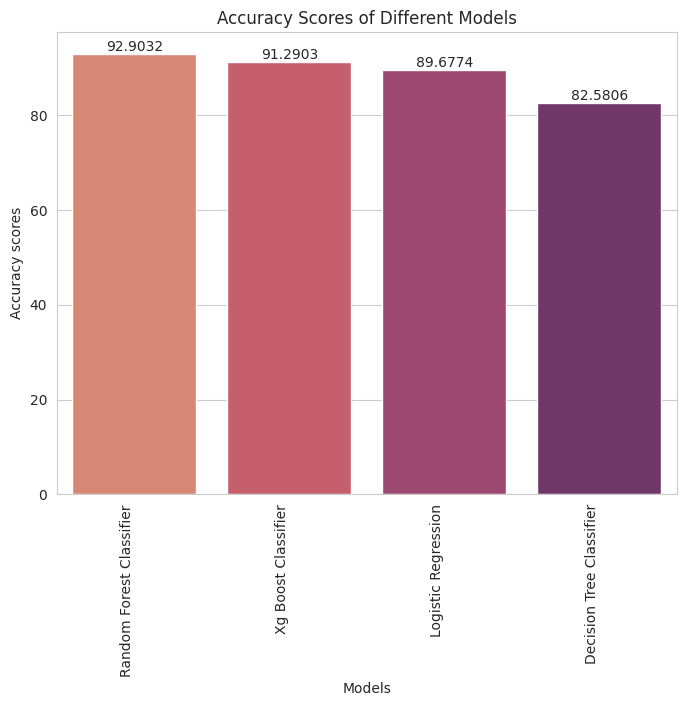

In [ ]:
# Using seborn library
# Importing Libraries

import pandas as pd                  # importing pandas library and giving an aliasing name as pd  --> for data analysis
import numpy as np                   # importing numpy library and giving an aliasing name as np   --> for numerical calculations and dealing with vectors and matrices
import matplotlib.pyplot as plt      # importing matplot library and giving aliasing name as plt   --> for visualization
import seaborn as sns                # importing seaborn library and giving aliasing name as sns   --> for visualization

plt.figure(figsize=(8,6))   # giving figure size(width, height)
fig1 =sns.barplot(x=models_sorted["Models"], y=models_sorted["Scores"], palette="flare")
fig1.set(title="Accuracy Scores of Different Models", xlabel="Models", ylabel="Accuracy scores" )
# Labeling each bar individually
for container in fig1.containers:      # which gives count values on bars
    fig1.bar_label(container)
plt.xticks(rotation=90, ha='right')
plt.show()



# **SQL Part**

In [ ]:
df.to_csv('credit_card_cleaned_dataset.csv') # you can find this file in google colab left pane files and download the file


In [ ]:
df_sql = df.copy()

In [ ]:
# Sql Part
# duckdb Library
import duckdb
conn=duckdb.connect()
conn.register('df_sql',df)

In [ ]:
conn.execute("select * from df_sql").fetchdf()  # printing the dataset

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_Income  \
0     5008827      M         Y              Y         0       180000.0   
1     5009744      F         Y              N         0       315000.0   
2     5009746      F         Y              N         0       315000.0   
3     5009749      F         Y              N         0       166500.0   
4     5009752      F         Y              N         0       315000.0   
...       ...    ...       ...            ...       ...            ...   
1543  5028645      F         N              Y         0       166500.0   
1544  5023655      F         N              N         0       225000.0   
1545  5115992      M         Y              Y         2       180000.0   
1546  5118219      M         Y              N         0       270000.0   
1547  5053790      F         Y              Y         0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_Status       Housing_Type        Age  \
0                  Married  House / apartment  51.000000   
1                  Married  House / apartment  37.000000   
2                  Married  House / apartment  43.952818   
3                  Married  House / apartment  37.000000   
4                  Married  House / apartment  37.000000   
...                    ...                ...        ...   
1543               Married  House / apartment  33.000000   
1544  Single / not married  House / apartment  28.000000   
1545               Married  House / apartment  36.000000   
1546        Civil marriage  House / apartment  42.000000   
1547               Married  House / apartment  45.000000   

      Years_Employed_Experience  Mobile_Phone  Work_Phone  Phone  Email_ID  \
0                           0.0             1           0      0         0   
1                           2.0             1           1      1         0   
2                           2.0             1           1      1         0   
3                           2.0             1           1      1         0   
4                           2.0             1           1      1         0   
...                         ...           ...         ...    ...       ...   
1543                        6.0             1           0      0         0   
1544                        3.0             1           0      0         0   
1545                        7.0             1           0      0         0   
1546                        2.0             1           1      1         0   
1547                        8.0             1           0      0         0   

     Type_Occupation  Family_Members  Label  
0           Laborers               2      1  
1           Laborers               2      1  
2           Laborers               2      1  
3           Laborers               2      1  
4           Laborers               2      1  
...              ...             ...    ...  
1543        Managers               2      0  
1544     Accountants               1      0  
1545        Managers               4      0  
1546         Drivers               2      0  
1547        Laborers               2      0  

[1548 rows x 19 columns]

In [ ]:
finding_null=conn.execute("select * from df_sql WHERE Label IS NULL")
finding_null.fetchdf()

Empty DataFrame
Columns: [Ind_ID, Gender, Car_Owner, Property_Owner, Children, Annual_Income, Type_Income, Education, Marital_Status, Housing_Type, Age, Years_Employed_Experience, Mobile_Phone, Work_Phone, Phone, Email_ID, Type_Occupation, Family_Members, Label]
Index: []

In [ ]:
df_sql.isnull().sum()

Ind_ID                       0
Gender                       0
Car_Owner                    0
Property_Owner               0
Children                     0
Annual_Income                0
Type_Income                  0
Education                    0
Marital_Status               0
Housing_Type                 0
Age                          0
Years_Employed_Experience    0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Type_Occupation              0
Family_Members               0
Label                        0
dtype: int64

In [ ]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ind_ID                     1548 non-null   int64  
 1   Gender                     1548 non-null   object 
 2   Car_Owner                  1548 non-null   object 
 3   Property_Owner             1548 non-null   object 
 4   Children                   1548 non-null   int64  
 5   Annual_Income              1548 non-null   float64
 6   Type_Income                1548 non-null   object 
 7   Education                  1548 non-null   object 
 8   Marital_Status             1548 non-null   object 
 9   Housing_Type               1548 non-null   object 
 10  Age                        1548 non-null   float64
 11  Years_Employed_Experience  1548 non-null   float64
 12  Mobile_Phone               1548 non-null   int64  
 13  Work_Phone                 1548 non-null   int64

#**Task 1**

**Group the customers based on their income type and find the average of their annual income.**

In [ ]:
avg_annualincome_customers_based_incometype = conn.execute("""
                                          SELECT  Type_Income, avg(Annual_Income) as Avg_Annual_Income
                                          FROM df_sql
                                          Group By Type_Income
                                          ORDER BY Avg_Annual_Income desc

                                          """)

avg_annualincome_customers_based_incometype.fetchdf()

Type_Income  Avg_Annual_Income
0  Commercial associate      214108.767123
1         State servant      202655.172414
2               Working      178634.864662
3             Pensioner      151981.042751

#**Task 2**

**Find the female owners of cars and property.**



In [ ]:
# Method 1

female_owners_of_cars_and_property = conn.execute("""
                                       SELECT count(Gender) as Female_owners_count, Car_Owner, Property_Owner
                                       FROM df_sql
                                       WHERE Gender='F' and Car_Owner='Y' and Property_Owner='Y'
                                       GROUP BY 2,3
                                       """)
female_owners_of_cars_and_property.fetchdf()

Female_owners_count Car_Owner Property_Owner
0                  179         Y              Y

In [ ]:
# Method 2

female_owners_of_cars_and_property = conn.execute("""
                                       SELECT Ind_ID, Gender, Car_Owner, Property_Owner
                                       FROM df_sql
                                       WHERE Gender='F' and Car_Owner='Y' and Property_Owner='Y'

                                       """)
female_owners_of_cars_and_property.fetchdf()

Ind_ID Gender Car_Owner Property_Owner
0    5018498      F         Y              Y
1    5018501      F         Y              Y
2    5018503      F         Y              Y
3    5024213      F         Y              Y
4    5036660      F         Y              Y
..       ...    ...       ...            ...
174  5048458      F         Y              Y
175  5023719      F         Y              Y
176  5033520      F         Y              Y
177  5024049      F         Y              Y
178  5053790      F         Y              Y

[179 rows x 4 columns]

#**Task 3**

**Find the male customers who are staying with their families.**

In [ ]:
male_customers_staying_with_families = conn.execute("""
                                         SELECT Gender, Family_Members
                                         FROM df_sql
                                         WHERE Gender='M' and Family_Members>=1
                                         """)
male_customers_staying_with_families.fetchdf()

Gender  Family_Members
0        M               2
1        M               3
2        M               3
3        M               1
4        M               3
..     ...             ...
563      M               2
564      M               2
565      M               3
566      M               4
567      M               2

[568 rows x 2 columns]

#**Task 4**

**Please list the top five people having the highest income.**

In [ ]:
# Method 1

top5_highest_income = conn.execute("""
                        SELECT Ind_ID,  Annual_Income
                        FROM df_Sql
                        ORDER BY Annual_Income desc
                        LIMIT 5

                        """)

top5_highest_income.fetchdf()

Ind_ID  Annual_Income
0  5010864       380250.0
1  5010868       380250.0
2  5010869       380250.0
3  5021303       380250.0
4  5024213       380250.0

In [ ]:
# Method 2

top5_highest_income = conn.execute("""
                        SELECT Ind_ID, max(Annual_Income) as Highest_Income
                        FROM df_Sql
                        GROUP BY Ind_ID
                        ORDER BY Highest_Income desc
                        LIMIT 5

                        """)

top5_highest_income.fetchdf()

Ind_ID  Highest_Income
0  5010864        380250.0
1  5010868        380250.0
2  5010869        380250.0
3  5021303        380250.0
4  5024213        380250.0

#**Task 5**

**How many married people are having bad credit?**

In [ ]:
# Method 1:
# Label: 0 is application approved and 1 is application rejected.

married_bad_credit = conn.execute("""
                        SELECT count(Marital_Status) as Married_Applicants_Counts, Label as Credit_Card_Not_Approved
                        FROM df_sql
                        WHERE Marital_Status = 'Married' and Label=1
                        GROUP BY Label

                        """)

married_bad_credit.fetchdf()

Married_Applicants_Counts  Credit_Card_Not_Approved
0                        114                         1

In [ ]:
# Method 2:
# Label: 0 is application approved and 1 is application rejected.


married_bad_credit = conn.execute("""
                        SELECT COUNT(*) AS Married_Bad_Credit_Count
                        FROM df_sql
                        WHERE Marital_Status = 'Married' AND Label = 1

                        """)

married_bad_credit.fetchdf()

Married_Bad_Credit_Count
0                       114

#**Task 6**

**What is the highest education level and what is the total count?**

In [ ]:
# Method 1 :

highest_education_level_total_count = conn.execute("""
                                          SELECT Education as Highest_Education_Level, count(Education) as Applicants_Education_Level_Total_Count
                                          FROM df_sql
                                          GROUP BY Education
                                          ORDER BY Applicants_Education_Level_Total_Count desc
                                          LIMIT 1

                                          """)

highest_education_level_total_count.fetchdf()

Highest_Education_Level  Applicants_Education_Level_Total_Count
0  Secondary / secondary special                                    1031

In [ ]:
# Method 2 :

highest_education_level_total_count = conn.execute("""
                                          SELECT Education, COUNT(*) AS Total_Count
                                          FROM df_sql
                                          GROUP BY Education
                                          ORDER BY Total_Count DESC
                                          LIMIT 1;


                                          """)

highest_education_level_total_count.fetchdf()

Education  Total_Count
0  Secondary / secondary special         1031

#**Task 7 :**

**Between married males and females, who is having more bad credit?**

In [ ]:
# Method 1:

comparing_married_gender_bad_credits = conn.execute("""
                                           SELECT Gender, Marital_Status, Label, count(*) as Gender_Count_for_Bad_Credit
                                           FROM df_sql
                                           WHERE Marital_Status='Married' and Label=1
                                           GROUP BY 1,2,3
                                           ORDER BY Gender_Count_for_Bad_Credit desc
                                           LIMIT 1                                     -- Here Limit is optional
                                           """)

comparing_married_gender_bad_credits.fetchdf()

Gender Marital_Status  Label  Gender_Count_for_Bad_Credit
0      F        Married      1                           63

In [ ]:
# Method 2

comparing_married_gender_bad_credits = conn.execute("""
                                           SELECT Gender, COUNT(*) AS Bad_Credit_Count
                                           FROM df_sql
                                           WHERE Marital_Status = 'Married' AND Label = 1
                                           GROUP BY Gender;

                                           """)

comparing_married_gender_bad_credits.fetchdf()

Gender  Bad_Credit_Count
0      M                51
1      F                63

#**Conclusion :**

*  All the primary EDA steps that required are done and plotted various graphs to determine the correlation among the independent variables and also between the independent variables and dependent variable.

* The proposed machine learning-based prediction Random Forest Classifier model and achieved quite good accuracy 92% in Random Forest Classifier for predicting the Credit Card Approval, represents a significant step forward in our collective efforts in identifying the approval of Credit Card to the applicants and improve Banking sector outcomes. Through continued research can improve the efficacy of the model for different Banking based datasets.